# Часть 2: Исследовательский анализ данных в Python и проверка гипотез

Автор Богатырева Вика

Дата 15.05.25

## Описание данных

В вашем распоряжении снова будут данные о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года. Их вы уже использовали в предыдущей части проекта. Для удобства работы с данными на платформе в тетради Jupyter Notebook мы подготовили два датасета final_tickets_orders_df.csv и final_tickets_events_df.

## Содержание проекта

В прошлых уроках вы узнали, что коллеги из продуктового отдела сервиса Яндекс Афиша заметили общее изменение в пользовательском спросе. Причины этого пока неясны. Сработал фактор сезонности, и пользователи поменяли предпочтения? Или изменилась аудитория? Стоит также разобраться, какие события стали привлекать больше зрителей, а какие организаторы и площадки выбились в лидеры. А также понять, отличаются ли своей активностью пользователи мобильных устройств от клиентов, которые бронируют билеты со стационарного компьютера.

Проведите исследовательский анализ данных, чтобы дать ответы на вопросы коллег. В ходе проекта вы будете активно работать с категориями событий, рассчитывать среднюю выручку с заказа и продажи одного билета в рублях, а также изучать распределение значений по категориям и периодам времени.
Вам предстоит выполнить несколько шагов.

### Шаг 1. Загрузка данных и знакомство с ними

Загрузите данные и получите первую информацию о них. Оцените объём данных, их корректность и соответствие описанию, а также предположите, какие шаги необходимо сделать на стадии предобработки данных. Основные моменты зафиксируйте в промежуточном выводе.

In [1]:
# блок загрузки библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')
tenge = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [3]:
orders.describe()

,order_id,event_id,age_limit,revenue,tickets_count,total,days_since_prev
count,2.908490e+05,290849.000000,290849.000000,290849.000000,290849.000000,290849.000000,268909.000000
mean,4.326812e+06,438079.127702,10.211278,625.083054,2.754230,7526.465613,3.222525
std,2.497578e+06,147396.389016,6.518124,1227.316214,1.170467,15328.267730,11.355158
min,1.000000e+00,4436.000000,0.000000,-90.760000,1.000000,-358.850000,0.000000
25%,2.164039e+06,361961.000000,6.000000,116.790000,2.000000,2156.870000,0.000000
50%,4.327816e+06,498329.000000,12.000000,355.340000,3.000000,4771.390000,0.000000
75%,6.488606e+06,546284.000000,16.000000,809.750000,4.000000,8955.950000,1.000000
max,8.653108e+06,592325.000000,18.000000,81174.540000,57.000000,811745.400000,148.000000


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [5]:
events.describe()

,event_id,city_id,venue_id
count,22427.000000,22427.000000,22427.000000
mean,442092.938422,1156.666696,2817.026887
std,157426.949023,3891.504931,1087.999845
min,4436.000000,2.000000,894.000000
25%,360927.500000,25.000000,1882.000000
50%,522824.000000,63.000000,2849.000000
75%,553721.000000,213.000000,3865.000000
max,592325.000000,37172.000000,4677.000000


In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [7]:
events.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [8]:
tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [9]:
tenge.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [10]:
tenge[tenge['data'].duplicated()]

,data,nominal,curs,cdx


**Вывод**: 

В таблице orders среднее значение(mean) и медиана(50%) сильно различаются для столбцов revenue, total, days_since_prev. Можно сделать вывод, что в данных есть выбросы и они распределены ненормально. Также в revenue есть минимальное отрицательное значение -90.760000 и в total -358.850000. Строки с этими данными надо удалить. Пустых ячеек в столбце days_since_prev = 21940. Всего строк 290848

В таблице events нет пропусков. Таблица содержит идентификаторы и метод describe тут не поможет. Всего строк 22427.

В таблице tenge нет пропусков. Данные выглядят нормально на первый взгляд. Нет дубликатов в столбце data. Всего строк 357.

Думаю, дальше надо проверить наличие явных и неявных дубликатов в таблицах events, orders.

<div class="alert alert-info">
<h2> Типы данных <a class="tocSkip"> </h2>
Для столбцов orders:
    
- created_dt_msk указан некорректный тип object, нужно переименовать в datetime64
- created_ts_msk указан некорректный тип object, нужно переименовать в datetime64
- days_since_prev указан некорректный тип float, нужно переименовать в int
    
Для столбцов tenge:

- data указан некорректный тип object, нужно переименовать в datetime64
    
</div>

In [11]:
orders.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


### Шаг 2. Предобработка данных и подготовка их к исследованию

Проведите предобработку данных:
* Проверьте данные на пропуски. Проверьте, что выгрузка данных из SQL была успешной. Кроме столбца days_since_prev, данные не должны содержать пропусков.


In [12]:
orders['device_type_canonical'].unique()

array(['mobile', 'desktop'], dtype=object)

In [13]:
orders.isnull().sum()

order_id                     0
user_id                      0
created_dt_msk               0
created_ts_msk               0
event_id                     0
cinema_circuit               0
age_limit                    0
currency_code                0
device_type_canonical        0
revenue                      0
service_name                 0
tickets_count                0
total                        0
days_since_prev          21940
dtype: int64

**Вывод:** Выше проверяла кол-во пропусков, используя метод .isnull(). В orders пропуски есть только в столбце days_since_prev = 21940. Всего строк 290848 в дф. Проверила выгрузку в Dbeaver, там 290849 строк. Данные выгружены верно, кол-во столбцов совпадает. Также проверила первые 5 строк тут и в Dbeaver, строки совпадают. В device_type_unique содержатся только mobile, desktop.



In [14]:
events.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [15]:
events.isnull().sum()

event_id                  0
event_name                0
event_type_description    0
event_type_main           0
organizers                0
region_name               0
city_name                 0
city_id                   0
venue_id                  0
venue_name                0
venue_address             0
dtype: int64

**Вывод**: в дф events данные выгружены верно, столбцы совпадают со столбцами из DBeaver. Нет пропусков в данных.

In [16]:
tenge.isnull().sum()

data       0
nominal    0
curs       0
cdx        0
dtype: int64

**Вывод**: в дф tenge нет пропусков. данные выгружены верно. Нет дублиуатов по полю data.

In [17]:
# в дф tenge по столбцу data не найдены дубликаты
tenge_duplicates = tenge.duplicated('data')
tenge_duplicates.sum()

np.int64(0)

* Изучите значения в ключевых столбцах и при обнаружении ошибок обработайте их.
  * Для категориальных значений изучите, какие категории присутствуют в данных. Проверьте, встречаются ли значения, которые могут обозначать пропуски в данных или отсутствие информации. Проведите нормализацию данных, если это необходимо.
  * Для количественных значений посмотрите на распределение и наличие выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха. Для анализа данных важными показателями являются выручка с заказа revenue и количество билетов в заказе tickets_count, поэтому в первую очередь проверьте данные в этих столбцах. Если найдутся выбросы в выручке с заказа revenue, то отберите значения по 99-му процентилю. Не забудьте, что данные изначально были представлены в разных валютах, поэтому разделите анализ на рубли и тенге.


In [18]:
# В рекомендации указано, что можно объединить данные, поэтому объединю 3 дф

two = pd.merge(orders, events, on='event_id', how='inner')

In [19]:
# изменю в дф tenge столбец data на created_dt_msk, чтобы объединить по этому столбцу
tenge = tenge.rename(columns={'data': 'created_dt_msk'})

# объединила все дф в один большой
three = pd.merge(two, tenge, on='created_dt_msk', how='inner')

In [20]:
three.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290611 non-null  int64  
 1   user_id                 290611 non-null  object 
 2   created_dt_msk          290611 non-null  object 
 3   created_ts_msk          290611 non-null  object 
 4   event_id                290611 non-null  int64  
 5   cinema_circuit          290611 non-null  object 
 6   age_limit               290611 non-null  int64  
 7   currency_code           290611 non-null  object 
 8   device_type_canonical   290611 non-null  object 
 9   revenue                 290611 non-null  float64
 10  service_name            290611 non-null  object 
 11  tickets_count           290611 non-null  int64  
 12  total                   290611 non-null  float64
 13  days_since_prev         268698 non-null  float64
 14  event_name          

In [21]:
three.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",100,18.6972,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,№4850,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",100,18.3419,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,№1540,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",100,19.6475,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,№5049,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",100,18.5010,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,№832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",100,19.6648,kzt


In [22]:
# меняю тип данных столбцам

three['venue_id'] = three['venue_id'].astype('int')
three['city_id'] = three['city_id'].astype('int')
three['created_dt_msk'] = pd.to_datetime(three['created_dt_msk'])
three['created_ts_msk'] = pd.to_datetime(three['created_ts_msk'])

In [23]:
three.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290611 non-null  int64         
 1   user_id                 290611 non-null  object        
 2   created_dt_msk          290611 non-null  datetime64[ns]
 3   created_ts_msk          290611 non-null  datetime64[ns]
 4   event_id                290611 non-null  int64         
 5   cinema_circuit          290611 non-null  object        
 6   age_limit               290611 non-null  int64         
 7   currency_code           290611 non-null  object        
 8   device_type_canonical   290611 non-null  object        
 9   revenue                 290611 non-null  float64       
 10  service_name            290611 non-null  object        
 11  tickets_count           290611 non-null  int64         
 12  total                   290611

In [24]:
three.describe()

,order_id,created_dt_msk,created_ts_msk,event_id,age_limit,revenue,tickets_count,total,days_since_prev,city_id,venue_id,nominal,curs
count,2.906110e+05,290611,290611,290611.000000,290611.000000,290611.000000,290611.000000,290611.000000,268698.000000,290611.000000,290611.000000,290611.0,290611.000000
mean,4.326225e+06,2024-09-01 22:36:38.741272576,2024-09-02 13:31:19.397731072,438019.834992,10.207267,625.584360,2.754311,7532.524374,3.223541,937.021968,2711.363854,100.0,19.188676
min,1.000000e+00,2024-06-01 00:00:00,2024-06-01 00:00:42,4436.000000,0.000000,-90.760000,1.000000,-358.850000,0.000000,2.000000,894.000000,100.0,17.848600
25%,2.163618e+06,2024-07-30 00:00:00,2024-07-30 11:53:37.500000,361772.000000,6.000000,116.850000,2.000000,2160.070000,0.000000,39.000000,1706.000000,100.0,18.599100
50%,4.326366e+06,2024-09-12 00:00:00,2024-09-12 14:02:10,498275.000000,12.000000,356.010000,3.000000,4775.020000,0.000000,79.000000,2787.000000,100.0,19.325600
75%,6.488330e+06,2024-10-09 00:00:00,2024-10-09 15:57:55.500000,546287.000000,16.000000,810.130000,4.000000,8955.950000,1.000000,213.000000,3679.000000,100.0,19.788400
max,8.653108e+06,2024-10-31 00:00:00,2024-10-31 23:59:54,592325.000000,18.000000,81174.540000,57.000000,811745.400000,148.000000,37172.000000,4677.000000,100.0,20.277300
std,2.497551e+06,NaN,NaN,147423.078841,6.518540,1227.693064,1.170620,15333.076041,11.357199,3590.567741,1086.889156,0.0,0.622541


In [25]:
three.shape[0]

290611

In [26]:
# удалю отрицательные значения в revenue, total
three = three[three['revenue'] >= 0]
three = three[three['total'] >= 0]

Возможно данные были неверно перенесены, хотя они не заполнялись вручную...может быть для некоторых билетов и событий были какие-то промокоды, которые давали скидку больше, чем стоит сам билет. Среди отрицательных значений были большие и маленькие значения (напимер, -699, -7) 

In [27]:
# удалила 373 строки с отрицательными значениями в revenue, total
three.shape[0]

290228

In [28]:
# думаю что может быть выручка 0, например, когда использовали промокод 
# при покупке или льготный билет
three['revenue'].min()

np.float64(0.0)

In [29]:
# теперь проверю категории service_name, не вижу дубликаты
three['service_name'].unique()

array(['Край билетов', 'Мой билет', 'За билетом!', 'Лови билет!',
       'Билеты без проблем', 'Облачко', 'Лучшие билеты', 'Прачечная',
       'Быстробилет', 'Дом культуры', 'Весь в билетах', 'Билеты в руки',
       'Тебе билет!', 'Show_ticket', 'Городской дом культуры', 'Яблоко',
       'Билет по телефону', 'Выступления.ру', 'Росбилет',
       'Шоу начинается!', 'Мир касс', 'Восьмёрка', 'Телебилет',
       'Crazy ticket!', 'Реестр', 'Быстрый кассир', 'КарандашРУ',
       'Радио ticket', 'Дырокол', 'Вперёд!', 'Кино билет', 'Цвет и билет',
       'Зе Бест!', 'Тех билет', 'Лимоны', 'Билеты в интернете'],
      dtype=object)

In [30]:
# теперь проверю категории event_type_description, найдены дубли:   
# меня смущает категории подарок, событие. проверю их

three['event_type_description'].unique()

array(['спектакль', 'событие', 'цирковое шоу', 'выставка', 'шоу',
       'концерт', 'спорт', 'мюзикл', 'фестиваль', 'ёлка', 'балет',
       'спортивное мероприятие', 'опера', 'музыкальный спектакль',
       'кукольный спектакль', 'оперетта', 'снегурочка', 'рок-мюзикл',
       'экскурсия', 'подарок'], dtype=object)

In [31]:
# заменю:
 # спортивное мероприятие' -> 'спорт'
 # 'оперетта' -> 'опера'
 # 'музыкальный спектакль' -> 'спектакль'
    
three['event_type_description'] = three['event_type_description'].replace(
    ['спортивное мероприятие', 'оперетта', 'музыкальный спектакль'], 
    ['спорт', 'опера', 'спектакль'])

In [32]:
three['event_type_description'].unique()

array(['спектакль', 'событие', 'цирковое шоу', 'выставка', 'шоу',
       'концерт', 'спорт', 'мюзикл', 'фестиваль', 'ёлка', 'балет',
       'опера', 'кукольный спектакль', 'снегурочка', 'рок-мюзикл',
       'экскурсия', 'подарок'], dtype=object)

In [33]:
# всего 4 строки с такой категорией, пожалуй удалю
three[three['event_type_description'] == 'подарок']

three = three[three['event_type_description'] != 'подарок']

# для события = 58399 строк, пожалуй оставлю
three[three['event_type_description'] == 'событие']
three.shape[0]
three.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290224 entries, 0 to 290610
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290224 non-null  int64         
 1   user_id                 290224 non-null  object        
 2   created_dt_msk          290224 non-null  datetime64[ns]
 3   created_ts_msk          290224 non-null  datetime64[ns]
 4   event_id                290224 non-null  int64         
 5   cinema_circuit          290224 non-null  object        
 6   age_limit               290224 non-null  int64         
 7   currency_code           290224 non-null  object        
 8   device_type_canonical   290224 non-null  object        
 9   revenue                 290224 non-null  float64       
 10  service_name            290224 non-null  object        
 11  tickets_count           290224 non-null  int64         
 12  total                   290224 non-

<div class="alert alert-info">
<h2> Еще проверяю  <a class="tocSkip"> </h2>

</div>

In [34]:
# две валюты, все нормально

three['currency_code'].unique()

array(['rub', 'kzt'], dtype=object)

In [35]:
# вроде все нормально, проверю категорию "другое"
three['event_type_main'].unique()

array(['театр', 'выставки', 'другое', 'стендап', 'концерты', 'спорт',
       'ёлки'], dtype=object)

In [36]:
# эта категория часто встречается (65546)
three[three['event_type_main'] == 'другое'].shape[0]


65546

In [37]:
# есть большие значения, например, 47, 57, 37,30,27

three['tickets_count'].unique()

array([ 4,  2,  3,  1,  5,  6, 10,  9,  7, 13, 15, 11,  8, 14, 12, 47, 27,
       17, 19, 57, 30, 37])

In [38]:
three.shape[0]

290224

In [39]:
# с 57 билетов выручка 0...необычно, пожалуй удалю эту строку 
filtered = three.loc[three['tickets_count'] == 57, ['tickets_count', 'revenue', 'total', 
                                                    'event_type_description', 'event_type_main']]

three = three[three['tickets_count'] != 57]
three.shape[0]

290223

In [40]:
# с 47 билетов выручка есть
fil = three.loc[three['tickets_count'] == 47, ['tickets_count', 'revenue', 'total', 
                                                    'event_type_description', 'event_type_main']]

fil

,tickets_count,revenue,total,event_type_description,event_type_main
39416,47,640.41,32020.47,спорт,спорт


In [41]:
# с 37 билетов выручка есть
fi = three.loc[three['tickets_count'] == 37, ['tickets_count', 'revenue', 'total', 
                                                    'event_type_description', 'event_type_main']]

fi

,tickets_count,revenue,total,event_type_description,event_type_main
154586,37,1147.67,19127.89,спорт,спорт


In [42]:
# с 30 билетов выручки нет, удалю 2 строки тк мало информации
f = three.loc[three['tickets_count'] == 30, ['tickets_count', 'revenue', 'total', 
                                                    'event_type_description', 'event_type_main']]

three = three[three['tickets_count'] != 30]
three.shape[0]

290221

In [43]:
# с 27 билетов выручка есть
b = three.loc[three['tickets_count'] == 27, ['tickets_count', 'revenue', 'total', 
                                                    'event_type_description', 'event_type_main']]

b

,tickets_count,revenue,total,event_type_description,event_type_main
86271,27,328.49,10949.6,спорт,спорт
86274,27,328.49,10949.6,спорт,спорт


In [44]:
# есть рейтинги 0+, 6+, 12+, 16+ и 18+

three['age_limit'].unique() 

array([16,  0, 18, 12,  6])

In [45]:
# популярные категории 16+, 12+, 0+
three['age_limit'].value_counts()

age_limit
16    78550
12    62436
0     61228
6     52110
18    35897
Name: count, dtype: int64

**Вывод** проверила названия region_name, venue_name, city_name - вроде все норм. Удалила сомнительные строки с отрицательными значениями и непонятной категрией "подарок". Пока удалила 377 строк. Очистила данные, привела к нужному типу 4 столбца:

'venue_id'('int') 

'city_id'('int') 

to_datetime(three['created_dt_msk']) 

to_datetime(three['created_ts_msk'])

**Дополню вывод**: после проверки столбца tickets_count были выявлены большие значения 57, 47, 37, 30, 27. Отдельно их проверила и удалила сомнительные строки с нулевой выручкой т е удалила еще 3 строки. Итого удалено 380 строк. Проверила возрастные категории, выглядят адекватно.

  * Для количественных значений посмотрите на распределение и наличие выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха. Для анализа данных важными показателями являются выручка с заказа revenue и количество билетов в заказе tickets_count, поэтому в первую очередь проверьте данные в этих столбцах. Если найдутся выбросы в выручке с заказа revenue, то отберите значения по 99-му процентилю. Не забудьте, что данные изначально были представлены в разных валютах, поэтому разделите анализ на рубли и тенге.

In [46]:
three.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290221 entries, 0 to 290610
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290221 non-null  int64         
 1   user_id                 290221 non-null  object        
 2   created_dt_msk          290221 non-null  datetime64[ns]
 3   created_ts_msk          290221 non-null  datetime64[ns]
 4   event_id                290221 non-null  int64         
 5   cinema_circuit          290221 non-null  object        
 6   age_limit               290221 non-null  int64         
 7   currency_code           290221 non-null  object        
 8   device_type_canonical   290221 non-null  object        
 9   revenue                 290221 non-null  float64       
 10  service_name            290221 non-null  object        
 11  tickets_count           290221 non-null  int64         
 12  total                   290221 non-

In [47]:
three.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",100,18.6972,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,№4850,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",100,18.3419,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,№1540,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",100,19.6475,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,№5049,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",100,18.5010,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,№832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",100,19.6648,kzt


#### Для России

In [48]:
# срез таблицы для параметра 'rub' и создаем копию
three_rub = three[three['currency_code'] == 'rub'].copy()
three_rub.shape[0]

285152

#### Диаграмма размаха для revenue (руб)

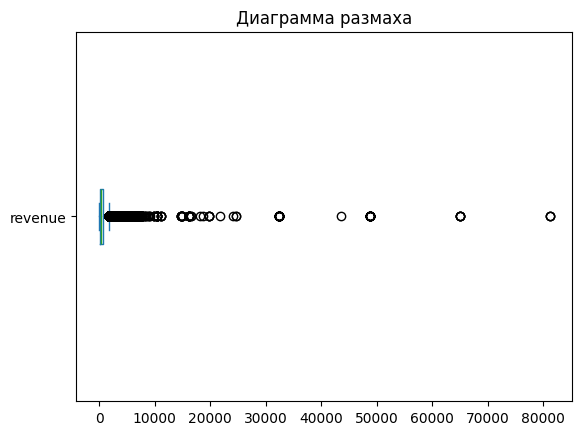

In [49]:
# Диаграмма размаха для revenue
three_rub['revenue'].plot(kind='box', vert=False)
plt.title('Диаграмма размаха')
plt.ylabel('')
plt.show()

# на диаграмме размаха видно, что нет отрицательных значей, все значения расположены с правой стороны,
# есть большие отдельные значения, начиная от 30к и до 80+к

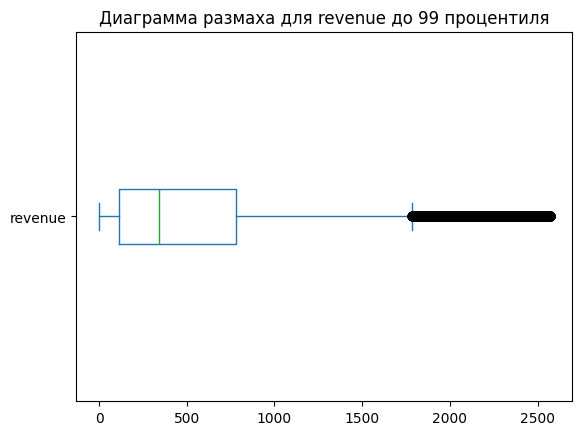

In [50]:
# теперь отберу значения по 99 процентилю

# сперва вычисляю 99 процентиль
percentile_99 = three_rub['revenue'].quantile(0.99)


# фильтрую по 99-му процентилю
three_rub = three_rub[three_rub['revenue'] <= percentile_99]

# диаграмма размаха для revenue до 99 процентиля
three_rub['revenue'].plot(kind='box', vert=False)
plt.title('Диаграмма размаха для revenue до 99 процентиля')
plt.ylabel('')
plt.show()

# уже видно сам ящик с усами, данные распределены более нормально, чем на  предыдущем графике и без выбросов
# медиана смещена влево, это говорит о том что есть много небольших значенйи revenue, которые тянут медиану влево

#### Диаграмма размаха для tickets_count (руб)

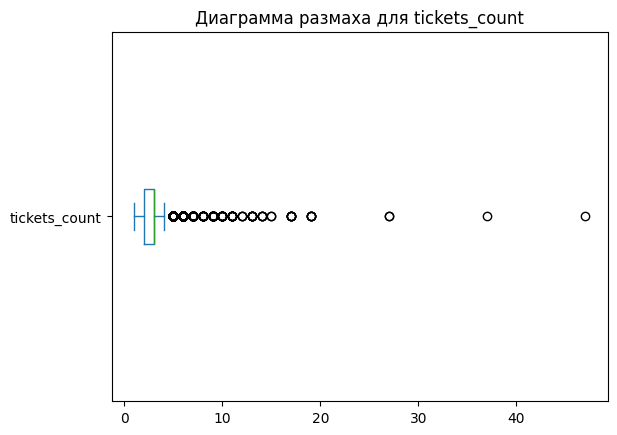

In [51]:
# Диаграмма размаха для tickets_count
three_rub['tickets_count'].plot(kind='box', vert=False)
plt.title('Диаграмма размаха для tickets_count')
plt.ylabel('')
plt.show()

# на диаграмме размаха видно, что нет отрицательных значей, все значения 
# расположены с правой стороны,
# усы ящика одинаковые по размеру, есть большие отдельные значения, начиная от 20 и до 50+

#### Диаграмма размаха для total (руб)

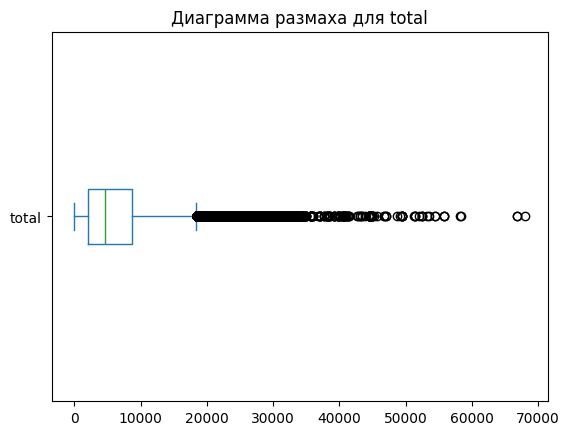

In [52]:
three_rub['total'].plot(kind='box', vert=False)
plt.title('Диаграмма размаха для total')
plt.ylabel('')
plt.show()

# медиана смещена влево, это говорит о том что есть много небольших значенйи total, 
# которые тянут медиану влево
# есть большие выбросы, начиная от 50к+ и до 70к+
# усы ящика неодинаковые, данные распределены ненормально

#### Диаграмма размаха для age_limit (руб)

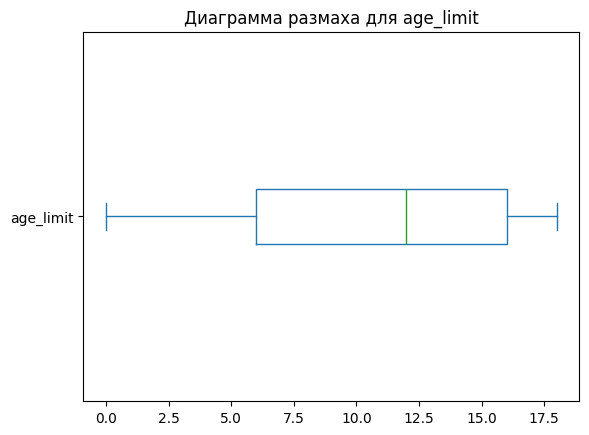

In [53]:
three_rub['age_limit'].plot(kind='box', vert=False)
plt.title('Диаграмма размаха для age_limit')
plt.ylabel('')
plt.show()

# медиана смещена вправо, это говорит о том что есть много значенйи age_limit, 
# которые тянут медиану за собой, нет выбросов
# усы ящика неодинаковые, данные распределены неравномерно
# можно сделать вывод, что на мероприятия много возрастных лимитов от 0 до 12.5 лет

In [54]:
three_rub.shape[0]

282352

#### Для Казахстана 

In [55]:
# анализ данных валюты рубли, отбираю строки с рублями
three_kzt = three[three['currency_code'] == 'kzt']

#### Диаграмма размаха для revenue (kzt)

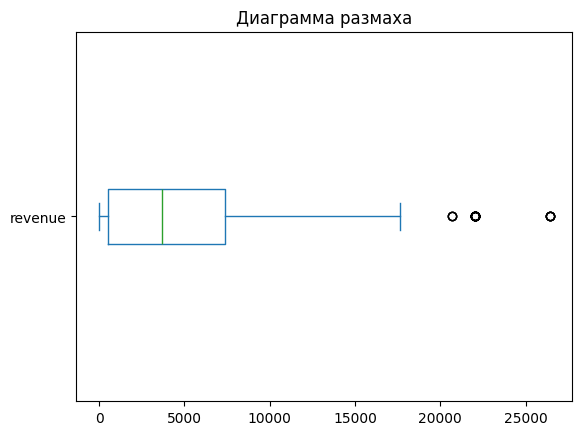

In [56]:
# Диаграмма размаха для revenue
three_kzt['revenue'].plot(kind='box', vert=False)
plt.title('Диаграмма размаха')
plt.ylabel('')
plt.show()

# на диаграмме размаха видно, что нет отрицательных значей, есть выбросы 
# начиная от 20к и до 25+к
# усы ящика неодинаковый, медиана находится по середине, данные распределены неравномерно

#### Диаграмма размаха для tickets_count (kzt)

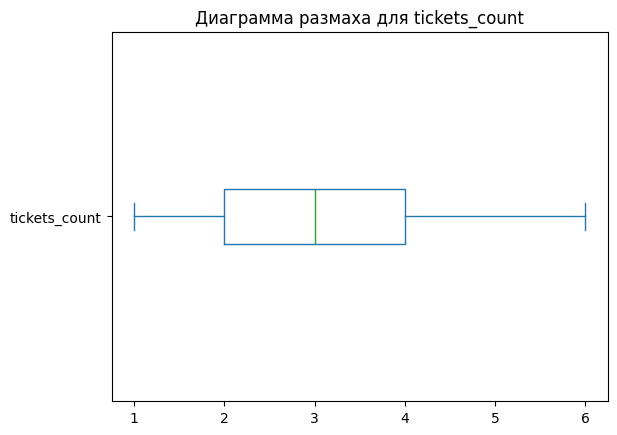

In [57]:
# Диаграмма размаха для tickets_count
three_kzt['tickets_count'].plot(kind='box', vert=False)
plt.title('Диаграмма размаха для tickets_count')
plt.ylabel('')
plt.show()

# на диаграмме размаха видно, что нет отрицательных значей
# усы ящика неодинаковые по размеру, нет выбросов, медиана расположена по середине
# данные распределены нормально

#### Диаграмма размаха для total (kzt)

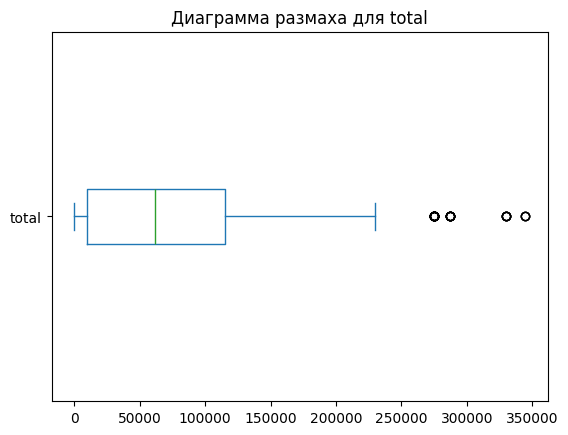

In [58]:
three_kzt['total'].plot(kind='box', vert=False)
plt.title('Диаграмма размаха для total')
plt.ylabel('')
plt.show()

# медиана смещена чуть-чуть вправо, это говорит о том что есть много 
# значенйи total, которые тянут медиану за собой 
# есть выбросы, начиная от 250к+ и до 350к+
# усы ящика неодинаковые, данные распределены неравномерно

#### Диаграмма размаха для age_limit (kzt)

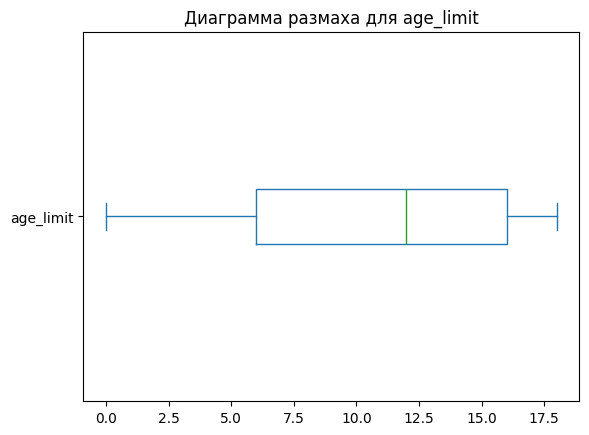

In [59]:
three_kzt['age_limit'].plot(kind='box', vert=False)
plt.title('Диаграмма размаха для age_limit')
plt.ylabel('')
plt.show()

# медиана смещена вправо, это говорит о том что есть много значенйи age_limit, 
# которые тянут медиану за собой, нет выбросов
# усы ящика неодинаковые, данные распределены неравномерно
# можно сделать вывод, что на мероприятия много возрастных лимитов от 0 до 12.5 лет

In [60]:
three_kzt.shape[0]

5069

* Проверьте явные и неявные дубликаты. Сделайте акцент на неявных дубликатах по бронированию билета без учёта идентификаторов заказа и, если такие будут, примите обоснованное решение, как их стоит обработать.


In [61]:
# объединю предобработанные дф three_rub и three_kzt

new_three = pd.concat([three_rub, three_kzt], axis=0, ignore_index=True)
new_three.shape[0]

287421

In [62]:
new_three.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",100,18.6972,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,№4850,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",100,18.3419,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,№1540,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",100,19.6475,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,№5049,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",100,18.5010,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,№832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",100,19.6648,kzt


In [63]:
# нет явных дубликатов
new_three.duplicated().sum()

np.int64(0)

In [64]:
new_three.shape[0]

287421

In [65]:
# ищу неявные дубликаты по всем признакам, кроме order_id
# найдены также 30 дубликатов
columns = new_three.duplicated(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id', 
                             'cinema_circuit', 'age_limit', 'currency_code', 
                             'device_type_canonical', 'revenue', 'service_name',
                            'tickets_count', 'total', 'days_since_prev', 'event_name',
                            'event_type_description', 'event_type_main', 'organizers',
                            'region_name', 'city_name', 'city_id', 'venue_id', 
                             'venue_name', 'venue_address', 'nominal', 'curs', 'cdx']).sum()
columns

np.int64(30)

In [66]:
# т к дублирующихся строк немного, то удалю их потому что их меньше 1% от всех данных
# по полю created_ts_msk время у всех заказов должно быть разным
new_three = new_three.drop_duplicates(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id', 
                             'cinema_circuit', 'age_limit', 'currency_code', 
                             'device_type_canonical', 'revenue', 'service_name',
                            'tickets_count', 'total', 'days_since_prev', 'event_name',
                            'event_type_description', 'event_type_main', 'organizers',
                            'region_name', 'city_name', 'city_id', 'venue_id', 
                             'venue_name', 'venue_address', 'nominal', 'curs', 'cdx'])
new_three.shape[0]

287391

* Проведите преобразования типов данных. Обратите внимание на типы данных с датой и временем, а также проверьте возможность снижения размерности количественных данных.


In [67]:
new_three.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287391 entries, 0 to 287420
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287391 non-null  int64         
 1   user_id                 287391 non-null  object        
 2   created_dt_msk          287391 non-null  datetime64[ns]
 3   created_ts_msk          287391 non-null  datetime64[ns]
 4   event_id                287391 non-null  int64         
 5   cinema_circuit          287391 non-null  object        
 6   age_limit               287391 non-null  int64         
 7   currency_code           287391 non-null  object        
 8   device_type_canonical   287391 non-null  object        
 9   revenue                 287391 non-null  float64       
 10  service_name            287391 non-null  object        
 11  tickets_count           287391 non-null  int64         
 12  total                   287391 non-

In [68]:
# для валюты руб и тенге можно уменьшить размерсноть данных, 
# например, можно разделить revenue и total на 1000

new_three['revenue'] = new_three['revenue'] / 1000
new_three['total'] = new_three['total'] / 1000
new_three.tail()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,nominal,curs,cdx
287416,6862648,ffc24188a1d58f2,2024-07-11,2024-07-11 12:39:48,538828,нет,12,kzt,mobile,4.73552,...,№2434,Верхоречная область,Серебрянка,163,4348,"Мастерская живого действия ""Юность"" Лтд","наб. Осенняя, д. 376",100,18.2738,kzt
287417,6763294,ffc24188a1d58f2,2024-09-05,2024-09-05 12:07:00,538828,нет,12,kzt,mobile,4.73552,...,№2434,Верхоречная область,Серебрянка,163,4348,"Мастерская живого действия ""Юность"" Лтд","наб. Осенняя, д. 376",100,18.4217,kzt
287418,3984021,ffc24188a1d58f2,2024-09-06,2024-09-06 19:20:03,533803,нет,16,kzt,mobile,1.84941,...,№4950,Шанырский регион,Широковка,162,3407,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7",100,18.5504,kzt
287419,8493869,ffc4133fbba20f4,2024-06-21,2024-06-21 14:04:34,533803,нет,16,kzt,mobile,3.69883,...,№4950,Шанырский регион,Широковка,162,3407,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7",100,18.5791,kzt
287420,8493898,ffc4133fbba20f4,2024-06-21,2024-06-21 13:41:39,533803,нет,16,kzt,mobile,3.69883,...,№4950,Шанырский регион,Широковка,162,3407,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7",100,18.5791,kzt


**Вывод**: Преобразование 4 столбцов сделала выше:
'venue_id'('int') 

'city_id'('int') 

to_datetime(three['created_dt_msk']) 

to_datetime(three['created_ts_msk'])

Уменьшила размерность двух столбцов revenue, total, разделила их на 1000.

* Создайте несколько новых столбцов:
  * revenue_rub — приведите выручку с заказа к единой валюте — российскому рублю. Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю final_tickets_tenge_df.csv за 2024 год. Значения в рублях представлены для 100 тенге.
  * one_ticket_revenue_rub — рассчитайте выручку с продажи одного билета на мероприятие.
  * month — выделите месяц оформления заказа в отдельный столбец.
  * season — создайте столбец с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'.

Рекомендация: вначале можно объединить данные в один датафрейм, а затем провести общую предобработку.
После предобработки проверьте, сколько данных вы отобрали, если выполняли фильтрацию, а также дайте промежуточный вывод с основными действиями и описанием новых столбцов.

In [69]:
# добавляю новый столбец revenue_rub и перевожу валюту из kzt в rub

def convert_cur(row):
    if row['currency_code'] == 'rub':
        return row['revenue']
    else:
        return row['revenue'] * (row['curs'] / row['nominal'])


new_three['revenue_rub'] = new_three.apply(convert_cur, axis=1)

# проверила, информация корректная
new_three.head()
new_three.tail()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,nominal,curs,cdx,revenue_rub
287416,6862648,ffc24188a1d58f2,2024-07-11,2024-07-11 12:39:48,538828,нет,12,kzt,mobile,4.73552,...,Верхоречная область,Серебрянка,163,4348,"Мастерская живого действия ""Юность"" Лтд","наб. Осенняя, д. 376",100,18.2738,kzt,0.865359
287417,6763294,ffc24188a1d58f2,2024-09-05,2024-09-05 12:07:00,538828,нет,12,kzt,mobile,4.73552,...,Верхоречная область,Серебрянка,163,4348,"Мастерская живого действия ""Юность"" Лтд","наб. Осенняя, д. 376",100,18.4217,kzt,0.872363
287418,3984021,ffc24188a1d58f2,2024-09-06,2024-09-06 19:20:03,533803,нет,16,kzt,mobile,1.84941,...,Шанырский регион,Широковка,162,3407,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7",100,18.5504,kzt,0.343073
287419,8493869,ffc4133fbba20f4,2024-06-21,2024-06-21 14:04:34,533803,нет,16,kzt,mobile,3.69883,...,Шанырский регион,Широковка,162,3407,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7",100,18.5791,kzt,0.687209
287420,8493898,ffc4133fbba20f4,2024-06-21,2024-06-21 13:41:39,533803,нет,16,kzt,mobile,3.69883,...,Шанырский регион,Широковка,162,3407,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7",100,18.5791,kzt,0.687209


In [70]:
# рассчитайте выручку с продажи одного билета на мероприятие
new_three['one_ticket_revenue_rub'] = new_three['revenue'] / new_three['tickets_count']

# выделите месяц оформления заказа в отдельный столбец
new_three['month'] = new_three['created_dt_msk'].dt.month


In [71]:
# создайте столбец с информацией о сезонности, включая такие категории: 
# 'лето', 'осень', 'зима', 'весна'

def season_name(row):
    if row['month'] in [12, 1, 2]:
        return 'зима'
    elif row['month'] in [3, 4, 5]:
        return 'весна'
    elif row['month'] in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень' 
    
new_three['season'] = new_three.apply(season_name, axis=1)

# проверила, информация корректная
new_three.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_id,venue_name,venue_address,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1.52194,...,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",100,18.6972,kzt,1.52194,0.380485,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,0.28945,...,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",100,18.3419,kzt,0.28945,0.144725,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1.25857,...,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",100,19.6475,kzt,1.25857,0.314642,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,0.00849,...,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",100,18.5010,kzt,0.00849,0.004245,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1.39041,...,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",100,19.6648,kzt,1.39041,0.463470,10,осень


**Вывод**: данные дф выгружены верно, пропуски есть только в days_since_prev.  Объединила 3 дф в один большой. Поменяла типы данных 4 столбцам: venue_id(int), city_id(int), created_dt_msk(datetime), created_ts_msk(datetime). 

Заменила категории в event_type_description: спортивное мероприятие -> спорт, оперетта -> опера, музыкальный спектакль -> спектакль.
    
Разделила данные для Росии и КЗХ, построила ящики с усами, по полю revenue убрала данные после 99 процентиля. 

Уменьшила размерность данных для revenue и total, поделив на 1000. Добавила новые 4 столбца.

До очистки было строк 290611, после очистки 287391.

In [72]:
# до очистки было строк 290611, после осталось 287391
# удалила 1% данных

full_data = 290611
filtered_data = 287391

dolia_filtered = round(full_data / filtered_data, 2)
dolia_filtered

1.01

## Шаг 3. Исследовательский анализ данных

### 3.1. Анализ распределения заказов по сегментам и их сезонные изменения

Анализ дашборда показал, что в данных наблюдается сезонность — осенью количество заказов увеличивается. На стадии исследовательского анализа изучите изменение пользовательской активности или пользовательского интереса в связи с сезонностью. Анализируйте динамику по таким разрезам:
* тип мероприятия event_type_main;
* тип устройства device_type_canonical;
* категория мероприятий по возрастному рейтингу age_limit.

В этом разделе изучите распределение заказов по сегментам и их сезонные изменения, выполнив следующие шаги:
* Для каждого месяца найдите количество заказов и визуализируйте результаты. Проверьте, фиксируется ли увеличение заказов от июня к ноябрю 2024 года.

In [73]:
# группирую данные по event_type_main, device_type_canonical, age_limit, month
group = new_three.groupby('month')['order_id'].count().reset_index()

C:\Users\cools\AppData\Local\Temp\ipykernel_13024\1295178376.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=group, x='month', y='order_id', ci=None)


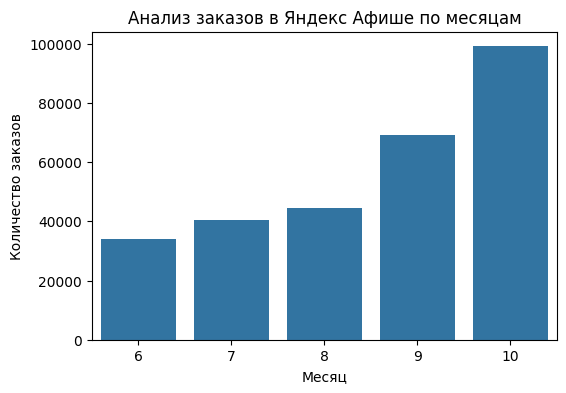

In [74]:
# вывожу сгруппированный график по month
plt.figure(figsize=(6, 4))

sns.barplot(data=group, x='month', y='order_id', ci=None)

# график
plt.title('Анализ заказов в Яндекс Афише по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(rotation=0)

plt.show()

**Вывод**: на графике видно, что происходит увеличение количества заказов от июня и до ноября.

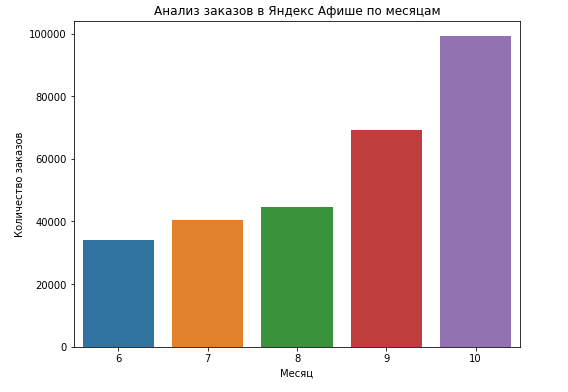

* Для осеннего и летнего периодов сравните распределение заказов билетов по разным категориям: тип мероприятия, тип устройства, категория мероприятия по возрастному рейтингу. Результаты визуализируйте подходящим графиком, который поможет сопоставить значения для летнего и осеннего сезонов. Рекомендация: поскольку абсолютное количество заказов в разные сезоны может меняться, при сопоставлении результатов для каждого сегмента используйте доли.


#### (Доли) Кол-во заказов по типу мероприятия

##### Для лета

In [75]:
## для лета

# срез таблицы для параметра лето и создаем копию
leto = new_three[new_three['season'] == 'лето'].copy()

# группирую данные по event_type_main для лета
group_season = leto.groupby(['event_type_main', 'season'])['order_id'].count().reset_index()
c = group_season.sort_values(by='order_id', ascending=False)
c

,event_type_main,season,order_id
2,концерты,лето,50797
1,другое,лето,32205
5,театр,лето,23943
4,стендап,лето,6346
3,спорт,лето,3003
0,выставки,лето,2407
6,ёлки,лето,273


In [76]:
# 118974 - кол-во заказов за лето
sum_leto = c['order_id'].sum() 
sum_leto

np.int64(118974)

In [77]:
c['dolia'] = c['order_id'] / sum_leto
c

,event_type_main,season,order_id,dolia
2,концерты,лето,50797,0.426959
1,другое,лето,32205,0.270689
5,театр,лето,23943,0.201246
4,стендап,лето,6346,0.053339
3,спорт,лето,3003,0.025241
0,выставки,лето,2407,0.020231
6,ёлки,лето,273,0.002295


##### Для осени

In [78]:
## для осени

# срез таблицы для параметра осень и создаем копию
osen = new_three[new_three['season'] == 'осень'].copy()

# группирую данные по event_type_main для осень
group_season = osen.groupby(['event_type_main', 'season'])['order_id'].count().reset_index()
c_osen = group_season.sort_values(by='order_id', ascending=False)
c_osen

,event_type_main,season,order_id
2,концерты,осень,62739
5,театр,осень,42735
1,другое,осень,33065
3,спорт,осень,18862
4,стендап,осень,6923
0,выставки,осень,2402
6,ёлки,осень,1691


In [79]:
# 168417 - кол-во заказов за лето
sum_osen = c_osen['order_id'].sum() 
sum_osen

np.int64(168417)

In [80]:
c_osen['dolia'] = c_osen['order_id'] / sum_osen
c_osen

,event_type_main,season,order_id,dolia
2,концерты,осень,62739,0.372522
5,театр,осень,42735,0.253745
1,другое,осень,33065,0.196328
3,спорт,осень,18862,0.111996
4,стендап,осень,6923,0.041106
0,выставки,осень,2402,0.014262
6,ёлки,осень,1691,0.010041


C:\Users\cools\AppData\Local\Temp\ipykernel_13024\3684154281.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tw_df, x='event_type_main', y='dolia',


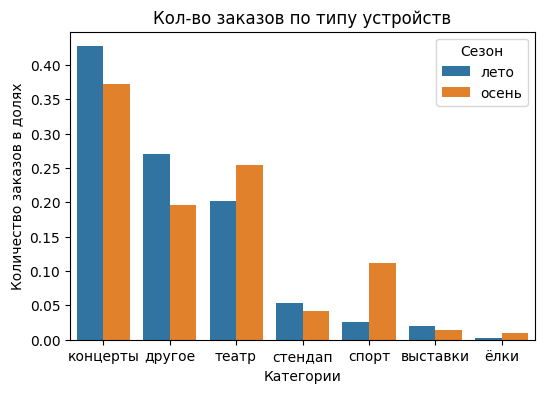

In [81]:
# для удобства объединю 2 табицы в одну
tw_df = pd.concat([c, c_osen], ignore_index=True)

# график в долях по количеству заказов для двух сезонов

# кол-во заказов по типу мероприятия

# два графика рядом

# размер графика
plt.figure(figsize=(6, 4))

sns.barplot(data=tw_df, x='event_type_main', y='dolia', 
            hue='season', ci = None)

plt.title('Кол-во заказов по типу устройств')
plt.xlabel('Категории')
plt.ylabel('Количество заказов в долях')
plt.legend(title='Сезон')
plt.xticks(rotation=0)
plt.show()


**Вывод** на графиках выше видно различие долей:

- для лета шкалы больше для категорий: Концерт, Другое, Стендап, Выставки
- для осени шкалы больше для категорий: Театр, Спорт, Елки

### (Доли) Кол-во заказов по типу устройства
#### Для лета

In [82]:
## для лета

# срез таблицы для параметра лето и создаем копию
leto = new_three[new_three['season'] == 'лето'].copy()

# группирую данные по event_type_main для лета
group_device = leto.groupby(['device_type_canonical', 'season'])['order_id'].count().reset_index()
device_leto = group_device.sort_values(by='order_id', ascending=False)
device_leto

,device_type_canonical,season,order_id
1,mobile,лето,95911
0,desktop,лето,23063


In [83]:
# 118974 - кол-во заказов за лето
sum_l = device_leto['order_id'].sum() 
sum_l

np.int64(118974)

In [84]:
device_leto['dolia'] = device_leto['order_id'] / sum_l
device_leto

,device_type_canonical,season,order_id,dolia
1,mobile,лето,95911,0.806151
0,desktop,лето,23063,0.193849


#### Для осени

In [85]:
## для осени

# срез таблицы для параметра осень и создаем копию
osen = new_three[new_three['season'] == 'осень'].copy()

# группирую данные по event_type_main для осень
group_os = osen.groupby(['device_type_canonical', 'season'])['order_id'].count().reset_index()
c_osen_dev = group_os.sort_values(by='order_id', ascending=False)
c_osen_dev

,device_type_canonical,season,order_id
1,mobile,осень,134129
0,desktop,осень,34288


In [86]:
# 118974 - кол-во заказов за лето
sum_o = c_osen_dev['order_id'].sum() 
sum_o

np.int64(168417)

In [87]:
c_osen_dev['dolia'] = c_osen_dev['order_id'] / sum_o

c_osen_dev

,device_type_canonical,season,order_id,dolia
1,mobile,осень,134129,0.79641
0,desktop,осень,34288,0.20359


In [88]:
# для удобства объединю 2 табицы в одну
two_df = pd.concat([device_leto, c_osen_dev], ignore_index=True)


C:\Users\cools\AppData\Local\Temp\ipykernel_13024\1802565521.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=two_df, x='device_type_canonical', y='dolia',


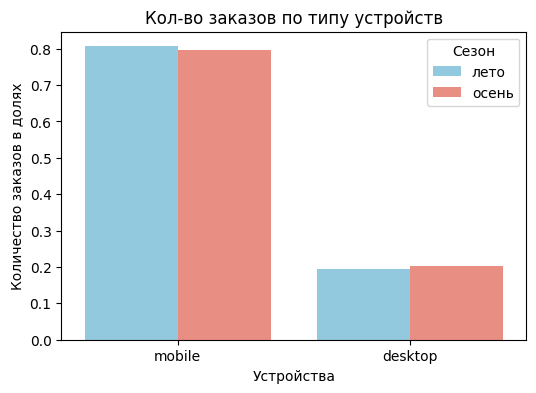

In [89]:
# размер графика
plt.figure(figsize=(6, 4))

sns.barplot(data=two_df, x='device_type_canonical', y='dolia', 
            hue='season', ci = None, palette={'лето': 'skyblue', 'осень': 'salmon'})

plt.title('Кол-во заказов по типу устройств')
plt.xlabel('Устройства')
plt.ylabel('Количество заказов в долях')
plt.legend(title='Сезон')
plt.xticks(rotation=0)
plt.show()

**Вывод**: на двух графиках видно что доли практически одинаковы для летнего и осеннего сезонов. 

Для лета параметры mobile = 0.81, desktop = 0.19.

Для осени параметры mobile = 0.79, desktop = 0.20.

Летом и осенью практически в одинаковых долях используют платформы mobile, desktop для оформления заказов билетов. Платформа mobile лидирует на графиках для двух сезонов.

### (Доли) Категории мероприятий по возрастному рейтингу


In [90]:
# группирую данные по event_type_main, age_limit, season
group_cat = new_three.groupby(['event_type_main', 'age_limit', 'season'])['order_id'
                                                                         ].count().reset_index()
group_cat = group_cat.sort_values(by='order_id', ascending=False)
group_cat.head(5)

,event_type_main,age_limit,season,order_id
27,концерты,16,осень,25739
26,концерты,16,лето,19906
31,спорт,0,осень,16490
52,театр,12,осень,14775
23,концерты,6,осень,14759


#### Для лета

In [91]:
# отбираю строки где лето
group_let = group_cat[group_cat['season'] == 'лето'].reset_index()


In [92]:
# общее кол-во order_id
sum_group_let = group_let['order_id'].sum()
sum_group_let

# считаю долю
group_let['dol_let'] = group_let['order_id'] / sum_group_let


C:\Users\cools\AppData\Local\Temp\ipykernel_13024\3510636440.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=group_let, x='age_limit', y='dol_let',


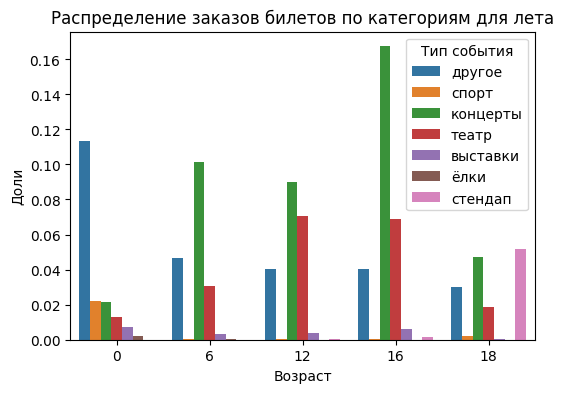

In [93]:
# кол-во заказов по категориям мероприятий по возрастному рейтингу

# размер графика
plt.figure(figsize=(6, 4))

sns.barplot(data=group_let, x='age_limit', y='dol_let', 
            hue='event_type_main', ci = None)
plt.title('Распределение заказов билетов по категориям для лета')
plt.xlabel('Возраст')
plt.ylabel('Доли')
plt.legend(title='Тип события')
plt.xticks(rotation=0)
plt.show()

#### Для осени

In [94]:
# отбираю строки где осень
group_os = group_cat[group_cat['season'] == 'осень'].reset_index()
group_os.head(5)

,index,event_type_main,age_limit,season,order_id
0,27,концерты,16,осень,25739
1,31,спорт,0,осень,16490
2,52,театр,12,осень,14775
3,23,концерты,6,осень,14759
4,54,театр,16,осень,14653


In [95]:
# общее кол-во order_id
sum_group_os = group_os['order_id'].sum()
sum_group_os

# считаю долю
group_os['dol_os'] = group_os['order_id'] / sum_group_os
group_os.head(5)

,index,event_type_main,age_limit,season,order_id,dol_os
0,27,концерты,16,осень,25739,0.152829
1,31,спорт,0,осень,16490,0.097912
2,52,театр,12,осень,14775,0.087729
3,23,концерты,6,осень,14759,0.087634
4,54,театр,16,осень,14653,0.087004


C:\Users\cools\AppData\Local\Temp\ipykernel_13024\207034127.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=group_os, x='age_limit', y='dol_os',


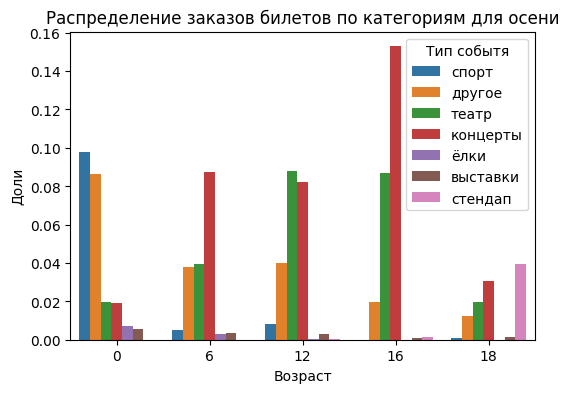

In [96]:
# кол-во заказов по категориям мероприятий по возрастному рейтингу

# размер графика
plt.figure(figsize=(6, 4))

sns.barplot(data=group_os, x='age_limit', y='dol_os', 
            hue='event_type_main', ci = None)
plt.title('Распределение заказов билетов по категориям для осени')
plt.xlabel('Возраст')
plt.ylabel('Доли')
plt.legend(title='Тип событя')
plt.xticks(rotation=0)
plt.show()

**Вывод**: вот 2 графика:
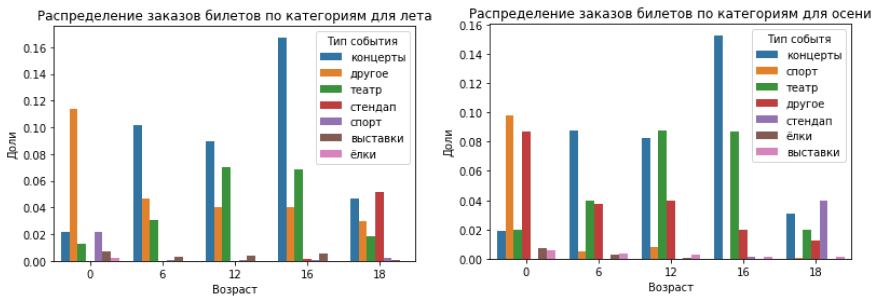

По ним можно понять какие возрастные категории есть на мероприятиях, например, **в категорию 18+ летом попадают**: концерт, тетатр, другое, стендап, спорт. А **осенью в 18+ категорию попадают**: концерт, театр, другое, стендап, выставки. 

* Изучите изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью. Видна ли динамика средней стоимости билета в разрезе разных категорий мероприятий? Для каждого типа мероприятия рассчитайте среднее значение выручки с одного билета, затем найдите относительное изменение осенних значений по сравнению с летними. Результат сопроводите подходящей визуализацией.

In [97]:
#one_ticket_revenue_rub - это выручка с продажи одного билета на мероприятие

# группирую данные по event_type_main, season
group_revenue = new_three.groupby(['event_type_main', 'season'])['one_ticket_revenue_rub'
                                                                         ].mean().reset_index()
group_revenue.head()

,event_type_main,season,one_ticket_revenue_rub
0,выставки,лето,0.086744
1,выставки,осень,0.091905
2,другое,лето,0.082397
3,другое,осень,0.080830
4,концерты,лето,0.432886


C:\Users\cools\AppData\Local\Temp\ipykernel_13024\3181437509.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=group_revenue, x='season', y='one_ticket_revenue_rub',


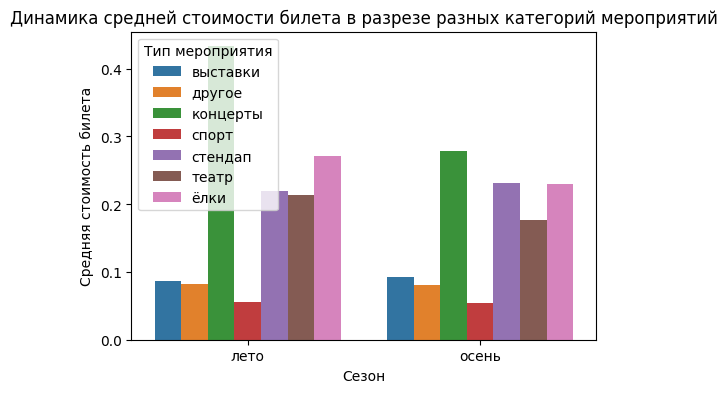

In [98]:
# динамика средней стоимости билета в разрезе разных категорий мероприятий

# размер графика
plt.figure(figsize=(6, 4))

sns.barplot(data=group_revenue, x='season', y='one_ticket_revenue_rub', 
            hue='event_type_main', ci = None)

plt.title('Динамика средней стоимости билета в разрезе разных категорий мероприятий')
plt.xlabel('Сезон')
plt.ylabel('Средняя стоимость билета')
plt.legend(title='Тип мероприятия')
plt.xticks(rotation=0)
plt.show()

<div class="alert alert-info">
<h2> <a class="tocSkip"> </h2>
Переделала график на более удобный
</div>

C:\Users\cools\AppData\Local\Temp\ipykernel_13024\3986197730.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=group_revenue, x='event_type_main', y='one_ticket_revenue_rub',


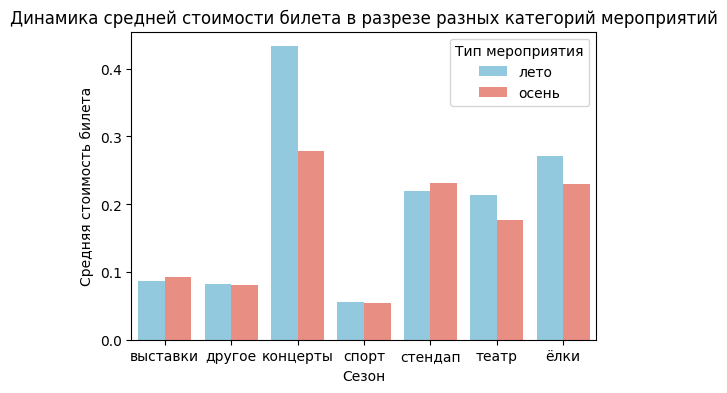

In [99]:
# динамика средней стоимости билета в разрезе разных категорий мероприятий

# размер графика
plt.figure(figsize=(6, 4))

sns.barplot(data=group_revenue, x='event_type_main', y='one_ticket_revenue_rub', 
            hue='season', ci = None, palette={'лето': 'skyblue', 'осень': 'salmon'})

plt.title('Динамика средней стоимости билета в разрезе разных категорий мероприятий')
plt.xlabel('Сезон')
plt.ylabel('Средняя стоимость билета')
plt.legend(title='Тип мероприятия')
plt.xticks(rotation=0)
plt.show()


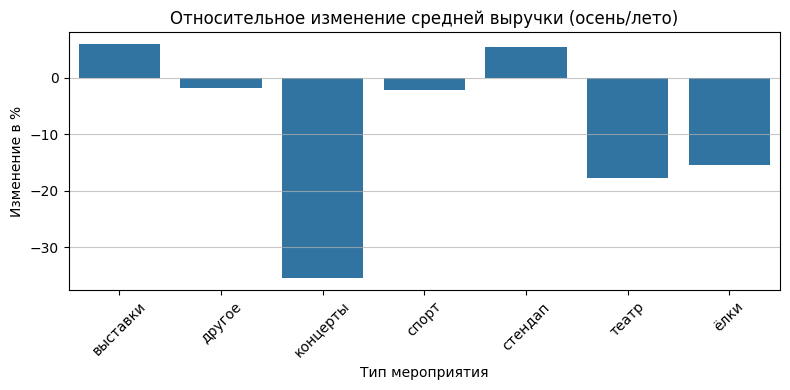

In [100]:
# делю дф на лето и осень
summ = group_revenue[group_revenue['season'] == 'лето'][['event_type_main', 
                                                           'one_ticket_revenue_rub']]
osen = group_revenue[group_revenue['season'] == 'осень'][['event_type_main', 
                                                            'one_ticket_revenue_rub']]

# объединяю для удобства
merged = pd.merge(summ, osen, on='event_type_main', suffixes=('_лето', '_осень'))
merged.head()

# расчет относительного изменения осенних значений по сравнению с летними в процентах
merged['percent'] = ((merged['one_ticket_revenue_rub_осень'] / merged['one_ticket_revenue_rub_лето'] - 1) * 100)

# график
plt.figure(figsize=(8, 4))
sns.barplot(
    data=merged,
    x='event_type_main',
    y='percent'
)
plt.title('Относительное изменение средней выручки (осень/лето)')
plt.xlabel('Тип мероприятия')
plt.ylabel('Изменение в %')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

**Вывод**: для осеннего периода относительное изменение средней выручки выявлено для 5 категорий: другое, концерты, спорт, стендап, театр, елки. У этих категорий наблюдается снижение средней выручки относительно летнего сезона. У категорий: выставки и стендапы - средняя выручка с билета выросла.

* Сделайте вывод о том, как меняется распределение заказов в каждой категории с наступлением осени. Было ли изменение средней стоимости одного билета в разрезе разных типов мероприятий?

**Вывод**:

**Кол-во заказов по типу мероприятия:**
- для лета шкалы больше для категорий: Концерт, Другое, Стендап, Выставки
- для осени шкалы больше для категорий: Театр, Спорт, Елки  

**Кол-во заказов по типу устройства:** 

На графиках доли практически одинаковы для летнего и осеннего сезонов:

- для лета параметры mobile = 0.81, desktop = 0.19.
- для осени параметры mobile = 0.79, desktop = 0.20.

Летом и осенью практически в одинаковых долях используют платформы mobile, desktop для оформления заказов билетов. Платформа mobile лидирует на графиках для двух сезонов.

**Кол-во заказов по категориям мероприятий с возрастным рейтингом**:

Вот 2 графика:
    
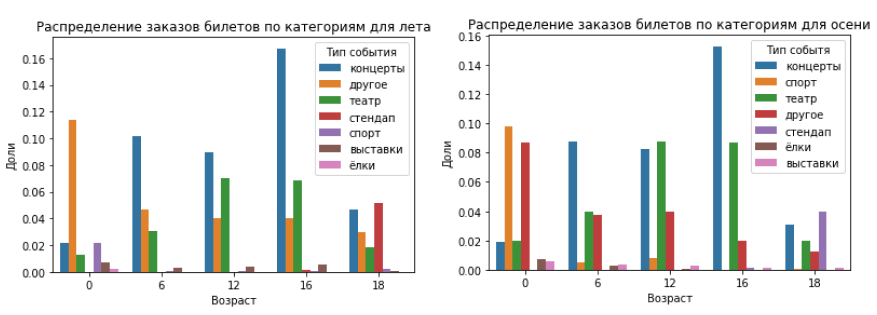

По ним можно понять какие возрастные категории есть на мероприятиях, например, **в категорию 18+ летом попадают**: концерт, тетатр, другое, стендап, спорт. А **осенью в 18+ категорию попадают**: концерт, театр, другое, стендап, выставки. 
    
**Изменение средней выручки для осени:**
    
Для осеннего периода относительное изменение средней выручки выявлено для 5 категорий: другое, концерты, спорт, стендап, театр, елки. У этих категорий наблюдается снижение средней выручки относительно летнего сезона. У категорий: выставки и стендапы - средняя выручка с билета выросла.
</div>

### 3.2. Осенняя активность пользователей

Изучите активность пользователей осенью 2024 года. В вашем распоряжении данные за два осенних месяца. Используйте только эти данные и сделайте следующее:
* Проанализируйте динамику изменений по дням для:
  * общего числа заказов;
  * количества активных пользователей DAU;
  * среднего числа заказов на одного пользователя;
  * средней стоимости одного билета.
  
Рекомендация: удобно создать одну сводную таблицу, и в ней по дням рассчитать число заказов и число уникальных пользователей, а затем найти величину — количество заказов на одного пользователя. Полученные результаты можно визуализировать с помощью линейного графика. Подобные графики вы строили на дашборде, только делали это с агрегацией по неделям.
* **Изучите недельную цикличность**. Выделите день недели и сравните пользовательскую активность в будни и выходные.
* **Напишите промежуточный вывод** о пользовательской активности и недельной цикличности.

In [101]:
# отбираю строки с осенними месяцами сент и окт

autumn = new_three[new_three['month'].isin([9, 10])]
autumn.shape[0]

168417

In [102]:
# в pivot_table нельзя напрямую указать разные функции агрегации для разных столбцов
# поэтому я сделаю несколько pivot_table и объединю их в одну сводную таблицу

# создаю сводную таблицу для столбца order_id
pivot_order = pd.pivot_table(
    autumn,
    values='order_id',  # Столбец, по которому будет производиться агрегация
    index='created_dt_msk',   # Столбцы, которые будут использоваться в качестве строк
     # Столбец, который будет использоваться в качестве столбцов
    aggfunc='count',  # Функция агрегации 
    fill_value=0  # Значение для заполнения пропусков
)

pivot_order

,order_id
created_dt_msk,
2024-09-01,1327
2024-09-02,1376
2024-09-03,5094
2024-09-04,1760
2024-09-05,1941
...,...
2024-10-27,2844
2024-10-28,2837
2024-10-29,2831


In [103]:
# создаю сводную таблицу для столбца user_id
pivot_user = pd.pivot_table(
    autumn,
    values='user_id',  # Столбец, по которому будет производиться агрегация
    index='created_dt_msk',   # Столбцы, которые будут использоваться в качестве строк
     # Столбец, который будет использоваться в качестве столбцов
    aggfunc='nunique',  # Функция агрегации 
    fill_value=0  # Значение для заполнения пропусков
)

pivot_user

,user_id
created_dt_msk,
2024-09-01,564
2024-09-02,573
2024-09-03,777
2024-09-04,684
2024-09-05,738
...,...
2024-10-27,1032
2024-10-28,985
2024-10-29,998


In [104]:
# создаю сводную таблицу для столбца revenue и tickets_count, 
# чтобы рассчитать среднюю стоимоть одного билета
pivot_revenue = pd.pivot_table(
    autumn,
    values=['revenue', 'tickets_count'],  # Столбец, по которому будет производиться агрегация
    index='created_dt_msk',   # Столбцы, которые будут использоваться в качестве строк
     # Столбец, который будет использоваться в качестве столбцов
    aggfunc='sum',  # Функция агрегации 
    fill_value=0  # Значение для заполнения пропусков
)

pivot_revenue

,revenue,tickets_count
created_dt_msk,,
2024-09-01,733.57182,3718
2024-09-02,777.95617,3695
2024-09-03,1234.32202,15252
2024-09-04,952.66595,4779
2024-09-05,1106.28609,5208
...,...,...
2024-10-27,1475.43335,7857
2024-10-28,1369.76061,7923
2024-10-29,1372.02301,7947


In [105]:
# объединяю сводные таблицы
pivot_table = pivot_order.join(pivot_user, rsuffix='_unique')


# переименовываю столбцы
pivot_table.columns = ['orders', 'unique_users']
pivot_table

# считаю среднее число заказов на одного пользователя
pivot_table['avg_order_per_user'] = round(pivot_table['orders'] / pivot_table['unique_users'], 2)
pivot_table

# объединяю сводные таблицы
table = pivot_table.join(pivot_revenue)

# Устанавливаем опцию для отображения всех строк
# pd.set_option('display.max_rows', None)

# считаю среднюю стоимость одного билет (* на 1000, потому что ранее делила revenue на 1000)
table['avg_cost'] = round(table['revenue'] * 1000 / table['tickets_count'], 2)
table

,orders,unique_users,avg_order_per_user,revenue,tickets_count,avg_cost
created_dt_msk,,,,,,
2024-09-01,1327,564,2.35,733.57182,3718,197.30
2024-09-02,1376,573,2.40,777.95617,3695,210.54
2024-09-03,5094,777,6.56,1234.32202,15252,80.93
2024-09-04,1760,684,2.57,952.66595,4779,199.34
2024-09-05,1941,738,2.63,1106.28609,5208,212.42
...,...,...,...,...,...,...
2024-10-27,2844,1032,2.76,1475.43335,7857,187.79
2024-10-28,2837,985,2.88,1369.76061,7923,172.88
2024-10-29,2831,998,2.84,1372.02301,7947,172.65


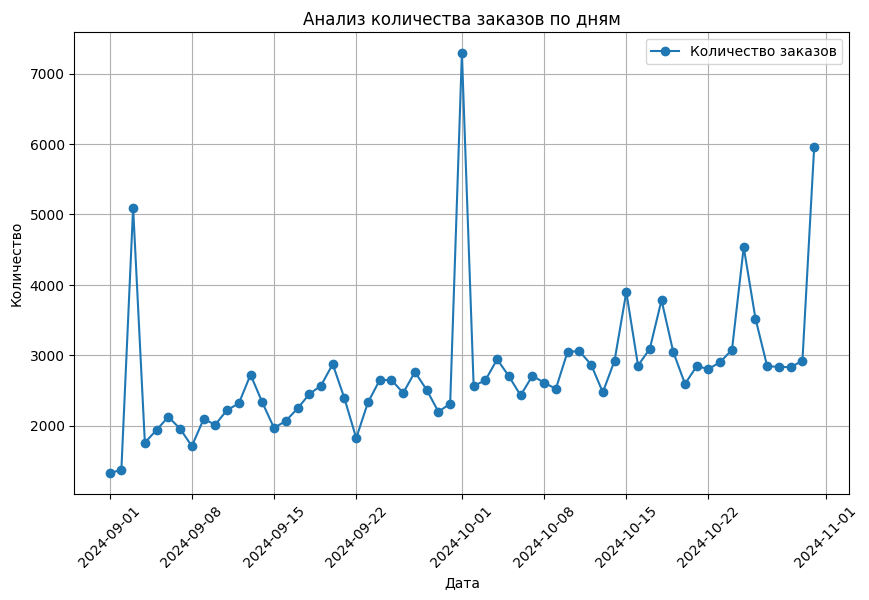

In [106]:
# линейный график
plt.figure(figsize=(10, 6))

# линия для количества заказов
plt.plot(table.index, table['orders'], label='Количество заказов', marker = "o")

# график
plt.title('Анализ количества заказов по дням')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

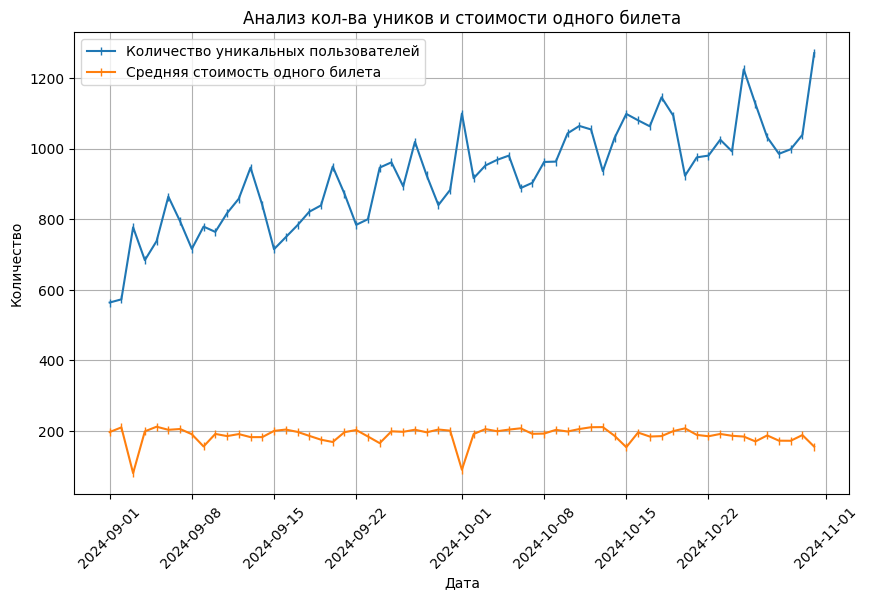

In [107]:
# линейный график
plt.figure(figsize=(10, 6))

# линия для количества уникальных пользователей
plt.plot(table.index, table['unique_users'], label='Количество уникальных пользователей', marker = "|")

# линия для среднего количества заказов на пользователя
plt.plot(table.index, table['avg_cost'], label='Средняя стоимость одного билета', marker = "|")

# график
plt.title('Анализ кол-ва уников и стоимости одного билета')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

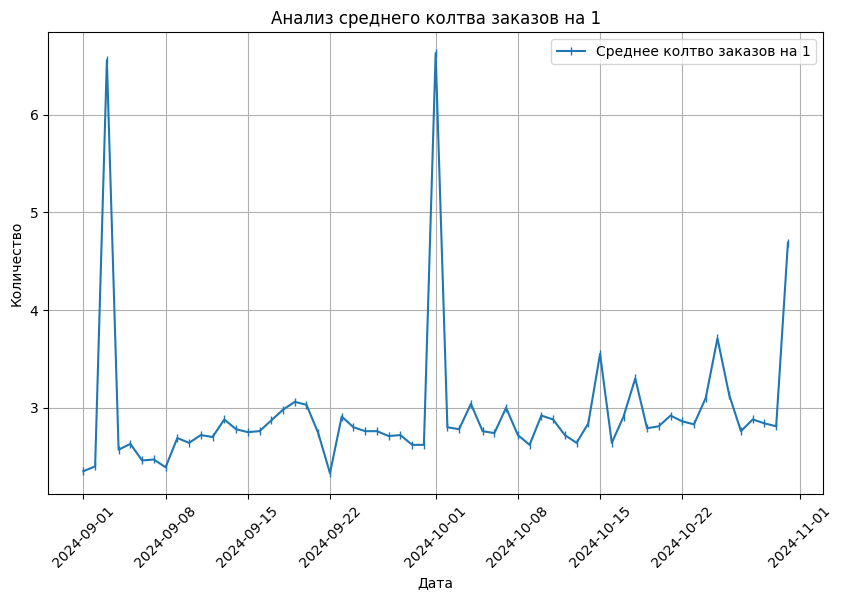

In [108]:
# линейный график
plt.figure(figsize=(10, 6))

# линия для среднего количества заказов на пользователя
plt.plot(table.index, table['avg_order_per_user'], label='Среднее колтво заказов на 1', marker = "|")

# график
plt.title('Анализ среднего колтва заказов на 1')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

#### Недельная цикличность

In [109]:
# недельная цикличность

# извлекаю данные с 2024-10-08 по 2024-10-15
start_date = '2024-10-08'
end_date = '2024-10-15'
week_table = table.loc[start_date:end_date]
week_table

,orders,unique_users,avg_order_per_user,revenue,tickets_count,avg_cost
created_dt_msk,,,,,,
2024-10-08,2613,962,2.72,1378.84839,7144,193.01
2024-10-09,2524,963,2.62,1379.68043,6778,203.55
2024-10-10,3050,1043,2.92,1614.93963,8118,198.93
2024-10-11,3059,1064,2.88,1754.70900,8524,205.86
2024-10-12,2869,1054,2.72,1673.57429,7932,210.99
2024-10-13,2475,936,2.64,1450.46792,6863,211.35
2024-10-14,2923,1030,2.84,1492.08164,7992,186.70
2024-10-15,3898,1098,3.55,1705.16097,11038,154.48


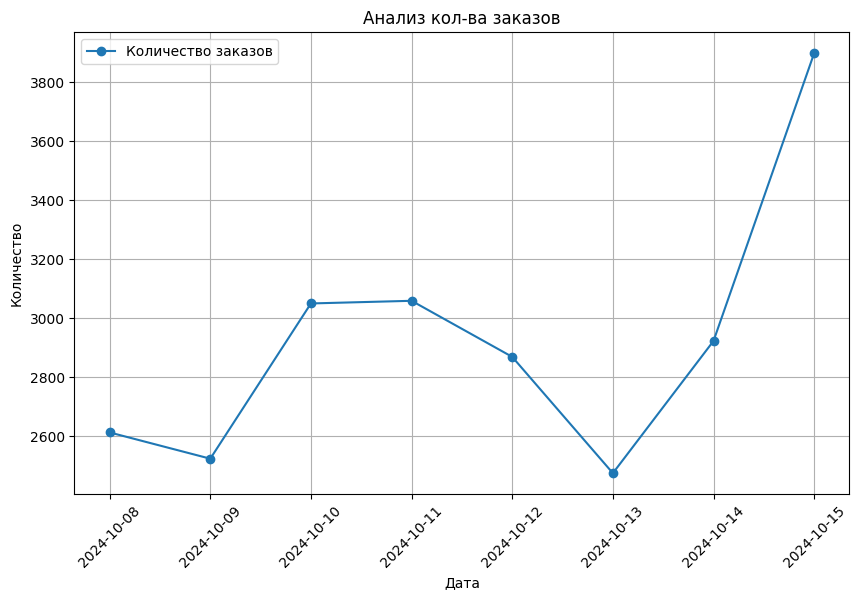

In [110]:
# строю линейный график для недельных показателей
plt.figure(figsize=(10, 6))

# линия для количества заказов
plt.plot(week_table.index, week_table['orders'], label='Количество заказов', marker = "o")

# график
plt.title('Анализ кол-ва заказов')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

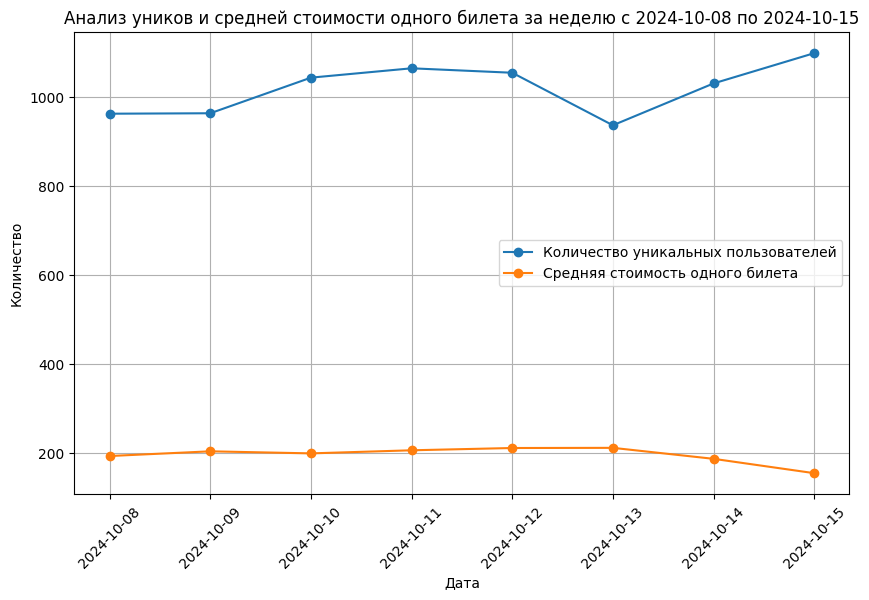

In [111]:
# строю линейный график для недельных показателей
plt.figure(figsize=(10, 6))

# линия для количества уникальных пользователей
plt.plot(week_table.index, week_table['unique_users'], label='Количество уникальных пользователей', marker = "o")

# линия для среднего количества заказов на пользователя
plt.plot(week_table.index, week_table['avg_cost'], label='Средняя стоимость одного билета', marker = "o")

# график
plt.title('Анализ уников и средней стоимости одного билета за неделю с 2024-10-08 по 2024-10-15')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

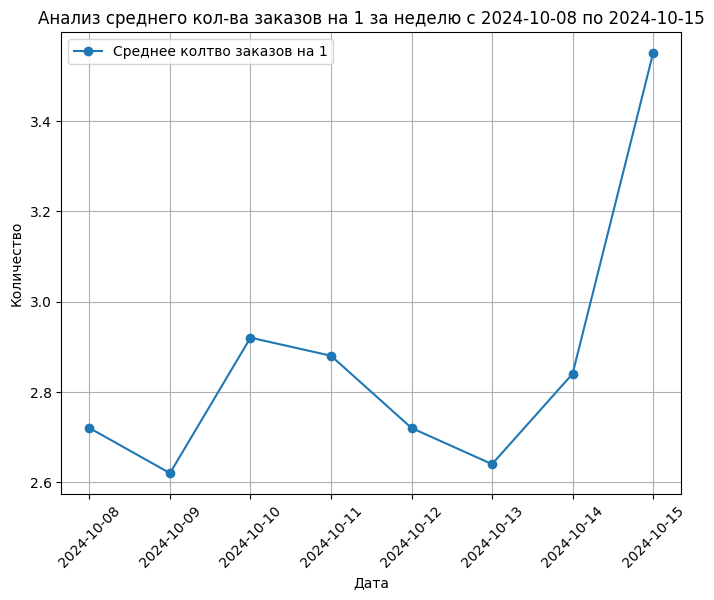

In [112]:
# строю линейный график для недельных показателей
plt.figure(figsize=(8, 6))

# линия для среднего количества заказов на пользователя
plt.plot(week_table.index, week_table['avg_order_per_user'], label='Среднее колтво заказов на 1', marker = "o")

# график
plt.title('Анализ среднего кол-ва заказов на 1 за неделю с 2024-10-08 по 2024-10-15')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

**Вывод**: 
    
**Недельная цикличность**: выбираю неделю с 2024-10-08(вт) по 2024-10-15(вт), выираю день 10-11(это пятница).

Для пятницы 2024-10-11:
- кол-во заказов = 3059
- кол-во уникальных пользователей = 1064
- среднее кол-во заказов на 1го пользователя 2.88
- Средняя стоимость одного билета = 205.86

Для субботы 2024-10-12:
- кол-во заказов = 2869
- кол-во уникальных пользователей = 1054
- среднее кол-во заказов на 1го пользователя 2.72
- Средняя стоимость одного билета = 210.99

По сравнению с будним днем, в выходной день спрос ниже. Причем снижение видно на трех первых параметрах, а средняя стоимость одного билета вывеше в выходной т к меньше выручка и кол-во купленных билетов.

### 3.3. Популярные события и партнёры

После того как изучите изменение популярности событий и пользовательской активности осенью 2024 года, посмотрите, как события распределены по регионам и партнёрам. Это позволит выделить ключевые регионы и партнёров, которые вносят наибольший вклад в выручку.
* Для каждого региона посчитайте уникальное количество мероприятий и общее число заказов. В каких регионах предлагается наибольшее разнообразие мероприятий?
* Для каждого билетного партнёра посчитайте общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов. Сделайте акцент на наиболее активных партнёрах.

Рекомендация: исследуйте не только абсолютные значения, но и доли. Например, для каждого региона посчитайте долю проводимых мероприятий от их общего числа или долю заказов в регионе от общего числа заказов.
В конце напишите промежуточный вывод, проанализируйте не только топ-категории, но и общее распределение данных между категориями. Существуют ли явные лидеры среди регионов и партнёров?

In [113]:
# Для каждого региона посчитайте уникальное количество мероприятий и общее число заказов.

# считаю уникальное кол-во мероприятий и кол-во заказов
regis = new_three.groupby('region_name').agg({
    'event_id': 'nunique',
    'order_id': 'count'
})

regis.columns = ['Уникальное кол-во мероприятий', 'Общ кол-во заказов']
regis = regis.sort_values(by='Уникальное кол-во мероприятий', ascending=False)
regis.head()

,Уникальное кол-во мероприятий,Общ кол-во заказов
region_name,,
Каменевский регион,5932,89656
Североярская область,3798,43725
Широковская область,1225,16099
Светополянский округ,1068,7487
Речиновская область,701,6266


**Вывод**: топ 3 региона с разнообразными мероприятиями: Каменевский регион, Североярская область, Широковская область.

In [114]:
# для каждого региона посчитайте долю проводимых мероприятий от их общего числа
# считаю долю
regis.head()

# считаю сумму уникальных мероприятий
sum_events = regis['Уникальное кол-во мероприятий'].sum()
regis

# считаю долю проводимых мероприятий от их общего числа
regis['dolia'] = round(regis['Уникальное кол-во мероприятий'] / sum_events, 2)
regis.head(10)

,Уникальное кол-во мероприятий,Общ кол-во заказов,dolia
region_name,,,
Каменевский регион,5932,89656,0.27
Североярская область,3798,43725,0.17
Широковская область,1225,16099,0.05
Светополянский округ,1068,7487,0.05
Речиновская область,701,6266,0.03
Травяная область,683,5036,0.03
Горицветская область,551,5153,0.02
Серебринская область,541,5586,0.02
Яблоневская область,534,6120,0.02


In [115]:
# Для каждого билетного партнёра посчитайте общее число уникальных мероприятий, 
# обработанных заказов и суммарную выручку с заказов билетов.

# считаю сумму уникальных мероприятий
sum_events_op = regis['Уникальное кол-во мероприятий'].sum()
sum_events_op


# считаю долю проводимых мероприятий от их общего числа
regis['dolia'] = round(regis['Уникальное кол-во мероприятий'] / sum_events_op, 2)
regis.head(10)

,Уникальное кол-во мероприятий,Общ кол-во заказов,dolia
region_name,,,
Каменевский регион,5932,89656,0.27
Североярская область,3798,43725,0.17
Широковская область,1225,16099,0.05
Светополянский округ,1068,7487,0.05
Речиновская область,701,6266,0.03
Травяная область,683,5036,0.03
Горицветская область,551,5153,0.02
Серебринская область,541,5586,0.02
Яблоневская область,534,6120,0.02


**Вывод**: 

**Регионы**:

**Вывод**: топ 3 региона с разнообразными мероприятиями: Каменевский регион, Североярская область, Широковская область.

Если смотреть на доли, то первое и второе места остаются прежними, а для 3 и 4 места появились другие регионы:

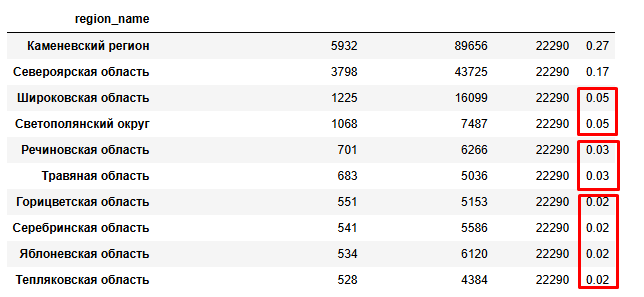

**Билетные агрегаторы**:

Топ 3 активных билетных партнера по кол-ву обработанных заказов: Билеты без проблем, Лови билет!, Билеты в руки, Мой билет(занимает второе место в топе по выручке).

Если смотреть на доли проводимых мероприятий от их общего числа, то первое место занимает - Лови билет!, а второе - Билеты без проблем.

In [116]:
# найду доли проводимых мероприятий по регионам от общего кол-ва мероприятий

# считаю уникальные мероприятия по регионам
event_unique = new_three.groupby('region_name')['event_id'].nunique()
event_unique

# считаю общее кол-во мероприятий
all_event = new_three['event_id'].count()
all_event

# вычисляю доли
doli = round(event_unique / all_event, 4)
doli = doli.sort_values(ascending=False)

#сокращаю вывод графика для удобного изучения
doli = doli.head(15)

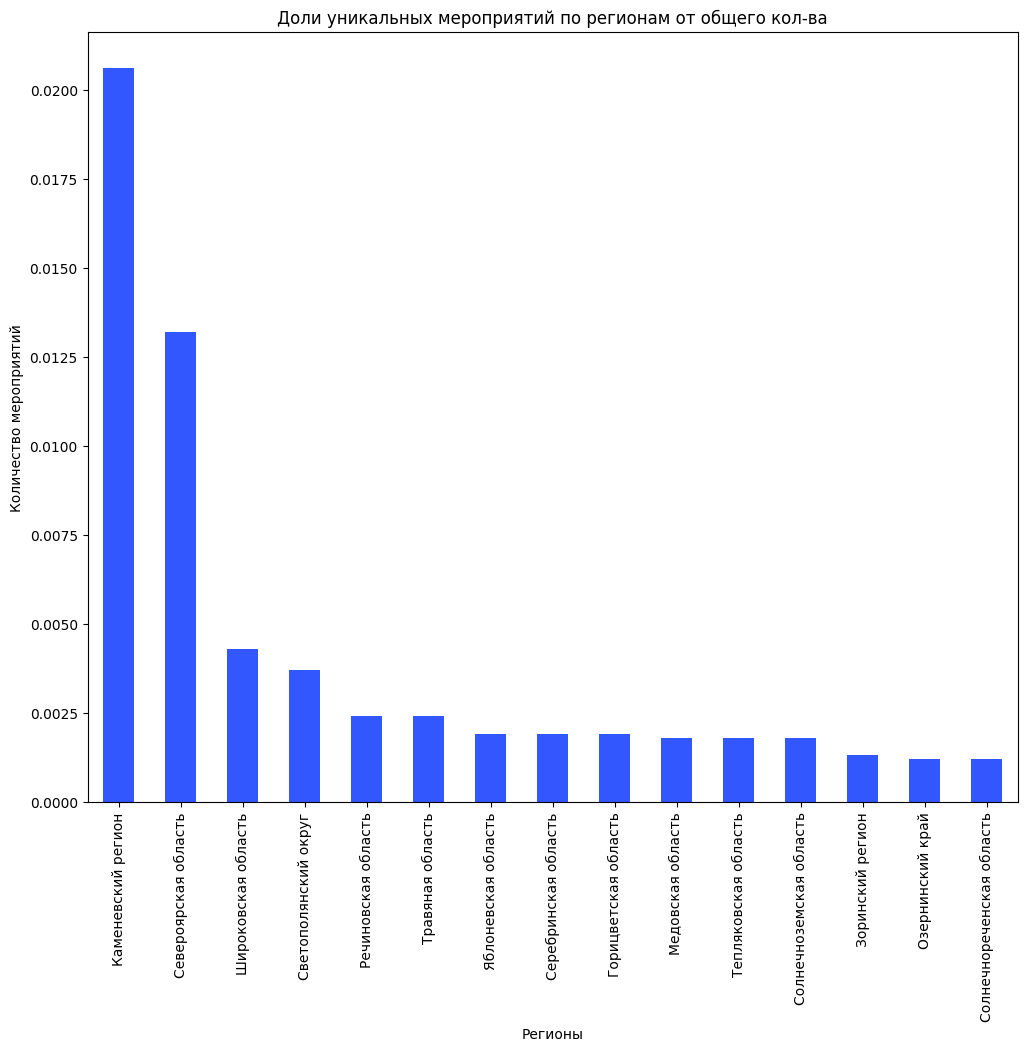

In [117]:
# доли на графике
plt.figure(figsize=(12, 10))

doli.plot(kind='bar',
      title='Доли уникальных мероприятий по регионам от общего кол-ва',
      ylabel='Количество мероприятий',
      xlabel='Регионы',
      color='#3357FF',
      rot = 90
);

**Общий вывод**: 

Топ 3 региона с разнообразными мероприятиями: Каменевский регион, Североярская область, Широковская область:
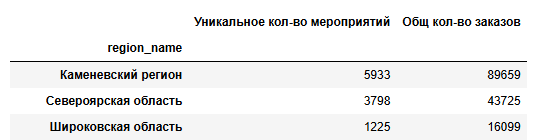

Топ 3 активных билетных партнера по кол-ву обработанных заказов: Билеты без проблем, Лови билет!, Билеты в руки: 
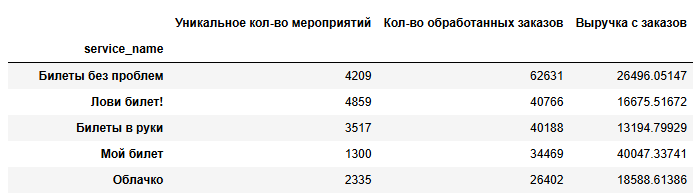

Топ 3 активных билетных партнера по выручке: Билеты без проблем, Мой билет, Облачко.

## Шаг 4. Статистический анализ данных

Коллеги из продуктового отдела хотят отдельно проверить несколько гипотез относительно активности пользователей мобильных и стационарных устройств. Проверьте две гипотезы, которые предполагают большую активность пользователей мобильных устройств:
* Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
* Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

Перед проведением гипотез изучите сравниваемые данные, обоснуйте выбор статистического теста, укажите формулировку нулевой и альтернативной гипотез. Результаты тестов прокомментируйте в промежуточном выводе. Используйте данные только за осенний период.

In [118]:
# отбираю строки с осенними месяцами сент и окт

autumn = new_three[new_three['month'].isin([9, 10])]
autumn.shape[0]

168417

In [119]:
# делю данные на 2 группы по устройствам mobile и desctop
mobile = autumn[autumn['device_type_canonical'] == 'mobile']
mobile.shape[0]


134129

In [120]:
desktop = autumn[autumn['device_type_canonical'] == 'desktop']
desktop.shape[0]


34288

In [121]:
# уникальные user_id
mobile_user = set(mobile['user_id'])
desktop_user = set(desktop['user_id'])

a = len(mobile_user)
b = len(desktop_user)
display(a, b)

14184

4868

In [122]:
# проверяю персечения в двух выборках по пользователям
intersection = mobile_user.intersection(desktop_user)
# найдено 3249 пересечений
len(intersection)

3249

In [123]:
# удаляем пересечения
mob = mobile_user - intersection
des = desktop_user - intersection

len(mob), len(des)

(10935, 1619)

In [124]:
# данные о пользователях без пересечений из дф autumn
mobile = autumn[autumn['user_id'].isin(mob)]
desktop = autumn[autumn['user_id'].isin(des)]

len(mobile), len(desktop)

(31240, 3191)

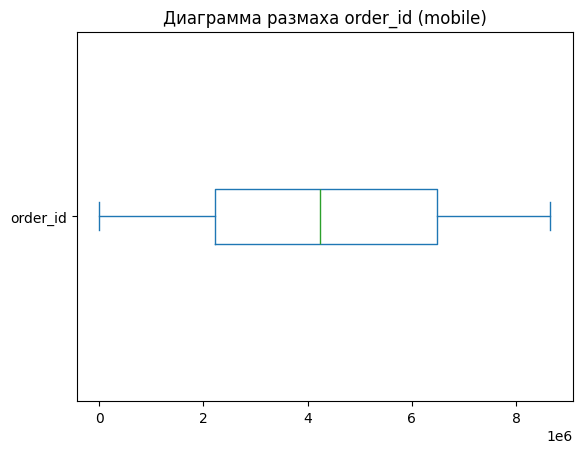

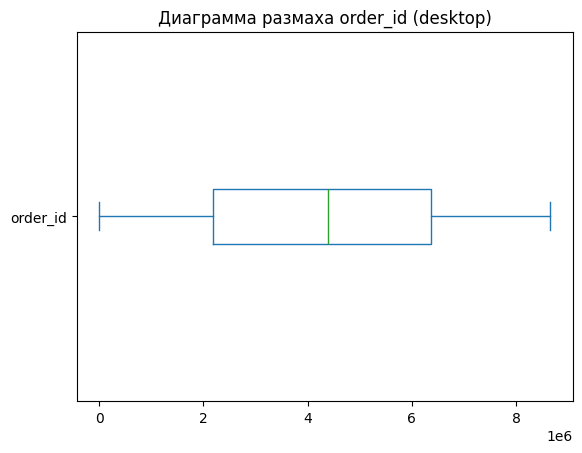

In [125]:
# проверяю распределение данных по столбцу order_id

mobile['order_id'].plot(kind='box', vert=False)
plt.title('Диаграмма размаха order_id (mobile)')
plt.ylabel('')
plt.show()

desktop['order_id'].plot(kind='box', vert=False)
plt.title('Диаграмма размаха order_id (desktop)')
plt.ylabel('')
plt.show()

# данные распределены нормально по столбцу order_id в двух выборках

#### Проверка гипотезы Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.

In [126]:
# буду использовать U-тест Манна-Уитни (у него нет требований к выборкам)

mobile_user_order = mobile['order_id'].nunique()
desktop_user_order = desktop['order_id'].nunique()
mobile_user_order, desktop_user_order
# 31240, 3191

(31240, 3191)

гипотеза Н0: Среднее количество заказов на одного пользователя мобильного приложения не выше (меньше) по сравнению с пользователями стационарных устройств

гипотеза H1: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств

In [127]:
# данные о пользователях без пересечений из дф autumn
mobile = autumn[autumn['user_id'].isin(mob)]
desktop = autumn[autumn['user_id'].isin(des)]

# массивы со средним кол-вом заказов для каждого пользователя в двух группах
mobile_order_avg = mobile.groupby('user_id')['order_id'].mean()
desktop_order_avg = desktop.groupby('user_id')['order_id'].mean()

alpha = 0.05
mw_test = mannwhitneyu(
    mobile_order_avg, # Выборка значений метрики для группы mobile
    desktop_order_avg, # Выборка значений метрики для группы desktop
    alternative='greater' # выбираем двустороннюю гипотезу 
                            # alternative='less' соответствует альтернативной гипотезе: mobile_user_order<desktop_user_order(b)
                            # alternative='greater' соответствует альтернативной гипотезе: mobile_user_order>desktop_user_order
)

if mw_test.pvalue < alpha:
    print(f'pvalue={mw_test.pvalue}')
    print('Н0 подтверждена! Среднее количество заказов на одного пользователя мобильного приложения не выше (меньше) по сравнению с пользователями стационарных устройств')
else:
    print(f'pvalue={mw_test.pvalue}')
    print('Н1 подтверждена! Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств')

pvalue=0.5031232628097331
Н1 подтверждена! Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств


In [128]:
# данные о пользователях без пересечений из дф autumn
mobile = autumn[autumn['user_id'].isin(mob)]
desktop = autumn[autumn['user_id'].isin(des)]

# массивы со средним кол-вом заказов для каждого пользователя в двух группах
mobile_order_avg = mobile.groupby('user_id')['order_id'].count()
desktop_order_avg = desktop.groupby('user_id')['order_id'].count()

# использую тест Манна-Уитни для односторонней гипотезы
alpha = 0.05
mw_test = mannwhitneyu(
    mobile_order_avg, # Выборка значений метрики для группы mobile
    desktop_order_avg, # Выборка значений метрики для группы desktop
    alternative='greater' # выбираем двустороннюю гипотезу 
                            # alternative='less' соответствует альтернативной гипотезе: mobile_user_order<desktop_user_order(b)
                            # alternative='greater' соответствует альтернативной гипотезе: mobile_user_order>desktop_user_order
)

if mw_test.pvalue < alpha:
    print(f'pvalue={mw_test.pvalue}')
    print('Гипотеза Н0! Среднее количество заказов на одного пользователя мобильного приложения не выше (меньше) по сравнению с пользователями стационарных устройств')
else:
    print(f'pvalue={mw_test.pvalue}')
    print('Гипотеза Н1! Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств')

pvalue=4.7602249799150366e-39
Гипотеза Н0! Среднее количество заказов на одного пользователя мобильного приложения не выше (меньше) по сравнению с пользователями стационарных устройств


#### Проверка гипотезы Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

In [129]:
# данные о пользователях без пересечений из дф autumn
# использую подготовленые дф mobile, desktop

# в days_since_prev есть 0 и Nan
mobile['days_since_prev'].head()

mobile.shape[0], desktop.shape[0]


(31240, 3191)

In [130]:
# выведу записи без Nan
mobile_filter = mobile[mobile['days_since_prev'].notna()]
desktop_filter = desktop[desktop['days_since_prev'].notna()]

mobile_filter.shape[0], desktop_filter.shape[0]

(24560, 2072)

гипотеза Н0: Среднее время между заказами пользователей мобильных приложений не выше по сравнению с пользователями стационарных устройств

гипотеза H1: Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств

In [131]:
# массивы со средним временем между заказами для каждого пользователя в двух группах
mob_avg_p = mobile_filter.groupby('user_id')['days_since_prev'].median()
des_avg_p = desktop_filter.groupby('user_id')['days_since_prev'].median()


alpha = 0.05
mw_test = mannwhitneyu(
    mob_avg_p, # Выборка значений метрики для группы mobile
    des_avg_p, # Выборка значений метрики для группы desktop
    alternative='greater' # выбираем двустороннюю гипотезу 
                            # alternative='less' соответствует альтернативной гипотезе: mob_avg<des_avg
                            # alternative='greater' соответствует альтернативной гипотезе: mob_avg>des_avg
)
if mw_test.pvalue < alpha:
    print(f'pvalue={mw_test.pvalue}')
    print('Н0! Среднее время между заказами пользователей мобильных приложений не выше по сравнению с пользователями стационарных устройств')
else:
    print(f'pvalue={mw_test.pvalue}')
    print('Н1! Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств')



pvalue=0.9424520660568608
Н1! Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств


In [132]:
# медианное значение для пользователей mobile и desktop
display(mob_avg_p.median(), des_avg_p.median())

np.float64(7.0)

np.float64(10.0)

## Шаг 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации — на что обратить внимание. В выводах коротко укажите:

* Информацию о данных, с которыми вы работали.
* Основные результаты анализа: какие мероприятия наиболее востребованы, как изменилась популярность мероприятий осенью, как изменилась стоимость среднего чека. Какую информацию можно получить после изучения пользовательской активности? Существуют ли среди регионов и партнёров явные лидеры по числу заказов и выручке с продажи билетов? Дополните вывод другой информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.
* Прокомментируйте результаты проверки гипотез.

В конце предложите рекомендации, на что стоит обратить внимание в первую очередь.

**Общий вывод**: Работала с данными ЯндексАфиши. Объединила 3 предоставленных дф в 1 большой, предобработала данные, удалила дубликаты и сомнительные строки с отрицательными значениями и непонятной категрией "подарок" (1% от всех данных). Привела к нужному типу 4 столбца:
- venue_id('int') 
- city_id('int') 
- to_datetime(three['created_dt_msk']) 
- to_datetime(three['created_ts_msk'])

Наибольшее кол-во заказов было в октябре.

Наиболее востребованные категории мероприятий летом:
- концерт
- театр
- другое
- спорт

Наиболее востребованные категории мероприятий осенью:
- концерт
- другое
- театр
- стендап

Стоимость среднего чека летом дороже, чем осенью по категориям:
- концерт
- елки
- стендап

Топ 3 региона с разнообразными мероприятиями: Каменевский регион, Североярская область, Широковская область.

Топ 3 активных билетных партнера по кол-ву обработанных заказов: Билеты без проблем, Лови билет!, Билеты в руки.

Топ 3 активных билетных партнера по выручке: Билеты без проблем, Мой билет, Облачко.

Две гипотезы были подтверждены с использованием теста Манна-Уитни, т к у теста нет требований к выборкам. В статистическом анализе мои выборки сильно отличаются по размеру.

**Дополню вывод**: осенью пользуются спросом мероприятия в помещениях, это спортивные меропреятия, театры, выступления и тд. Рекомендую делать упор на эти мероприятия, например, можно поработать над маркетингом, сделать больше и круче рекламу, дать какие-то промокоды для скидок при покупке билетов.

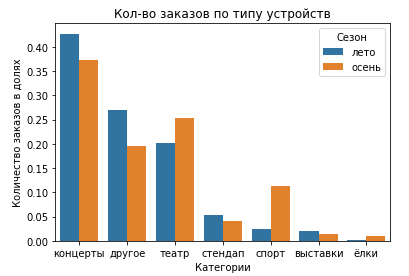

Выставки не пользуются высоким спросом, хотя они идеальны для посещения осенью. 

Также я выбрала рандомную неделю с 2024-10-08(вт) по 2024-10-15(вт) и посмотрела на активность пользователей...

Для пятницы 2024-10-11:
- кол-во заказов = 3059
- кол-во уникальных пользователей = 1064

Для субботы 2024-10-12:
- кол-во заказов = 2869
- кол-во уникальных пользователей = 1054

По сравнению с будним днем, в выходной день спрос ниже. Причем снижение видно на трех первых параметрах, а средняя стоимость одного билета выше в выходной т к меньше выручка и кол-во купленных билетов.

Можно сделать классные всплывающие пуши и по мероприятиям и запускать их в будни и выходные. Но не слишком часто. Это может заинтересовать пользователей, если они увидят подходящие для себя мероприятия.